# **Predicting Price For New Items / Furnitures**

# Business Understanding

### Context/Background: 
Sebuah perusahaan furnitur baru di Saudi Arab ingin menentukan harga produk barunya. Penentuan harga yang tepat menjadi hal yang krusial bagi sebuah perusahaan. Terdapat kasus dimana sebuah perusahaan yang gagal dalam menentukan harga bisa mendapatkan kerugian ribuan hingga jutaan dollar (sumber: https://www.qualtrics.com/au/experience-management/product/how-to-run-pricing-study/?rid=ip&prevsite=en&newsite=au&geo=ID&geomatch=au). Oleh karena itu, perusahaan berusaha membuat prediksi harga sebaik mungkin. 

Untuk menentukan harga furnitur, terdapat beberapa metode yaitu "cost-based method" dan "competitor-based method". Kami sebagai tim data diperusahaan tersebut ingin melakukan "competitor-based" analisis dalam menentukan harga furnitur kami, untuk itu kami menggunakan data dari kompetitor berupa katalog harga barang. Salah satu kompetitor dibidang furnitur yang ingin kami analisis adalah perusahaan IKEA, karena IKEA merupakan salah satu pemain besar di industri furnitur Saudi Arab (sumber:https://www.mordorintelligence.com/industry-reports/saudi-arabia-furniture-market).

Dalam melakukan "competitor-based" analisis metode yang kami gunakan adalah price prediction yang dibantu dengan Machine Learning. Dengan digunakannya metode machine learning dibanding dengan cara manual/konvensional, tentu perusahan mendapat beberapa keuntungan: 

- Dapat mengolah data dari kompetitor yang berjumlah banyak menjadi lebih cepat dan jika diolah dengan benar maka akurasi harga prediksi akan sangat baik. 
- Dengan machine learning, hasil harga yang diperoleh lebih objektif (tergantung fitur yang berpengaruh terhadap harga) tidak subjektif seperti dikerjakan secara manual/konvensional
- Dengan machine learning kami juga bisa memprediksi jenis furnitur yang lebih bervariasi, karena digunakan model regresi untuk menentukan harganya. 
- Dapat menangkap pola harga kompetitor, sehingga jika ada perubahaan database, pola baru tersebut akan terlihat dan dapat diprediksi. 
- Lebih hemat waktu dan biaya, karena akan memangkas waktu saat meng-analisis harga satu per satu, serta memangkas sumber daya manusia karena proses yang dilakukan nantiinya akan semi-otomatis. 
(sumber: https://dlabs.ai/blog/price-prediction-how-machine-learning-can-help-you-grow-your-sales/)


### Problem statement: 
Dalam melakukan analisis harga produk kompetitor secara konvensional dimana seperti melakukan riset pasar, melakukan sorting produk sesuai jenis barang yang ingin dicari, dll akan diperlukan tenaga, waktu dan biaya yang cukup besar. 

Lalu muncul pertanyaan:
Bagaimana cara perusahaan meningkatkan efisiensi dalam memprediksi harga produk berdasarkan kompetitor, sehingga hasil yang diperoleh lebih akurat dan cepat?

### Goals: 
Berdasarkan permasalahan tersebut perusahaan ingin memiliki fitur untuk memprediksi harga furnitur dari data kompetitor, secara (cepat), akurat dan otomatis/semi-otomatis. Perusahaan juga ingin tahu faktor apa yang mempengaruhi sebuah harga dari data kompetitor. 

Oleh karena itu, kami membuat model machine learning yang dapat memprediksi harga sebuah furnitur. Model yang digunakan berupa regresi harga dari data katalog kompetitor. 


# Data Understanding
Notes: 
- Setiap baris data merepresentasikan informasi mengenai sebuah produk furnitur, dari nama, deskripsi hingga harga produk
- Sebagian besar fitur bersifat kategorikal

Data set bersumber dari kaggle (Source: https://www.kaggle.com/ahmedkallam/ikea-sa-furniture-web-scraping). Data tersebut merupakan hasil web scrapping dari IKEA Arab Saudi.


## Attribute Information



| column name | description | 
| -- | -- |
| Unnamed: 0 | - |
| item_id | Product id |
| name | Name of product
| category | Category of product (furniture category) 
| price | Price of product after discount (current price)
| old_price | Price of product before discount
| sellable_online | Whether the product is sold online or not (bool)
| link | Web link
| other_colors | Any other choice of color? (bool)
| short_description | Brief description of product
| designer | Name who design the product
| depth | Depth of product (cm)
| height | Height of product (cm)
| width | Width of product (cm)

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering / Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
!pip install category_encoders
import re
import category_encoders as ce
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Model Selection
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import SCORERS, r2_score, mean_absolute_error, mean_squared_error

     |████████████████████████████████| 82 kB 326 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load Dataset
df = pd.read_csv('IKEA_Furniture.csv')
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [3]:
#Count and Datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


# Data Cleaning

Untuk melihat ada data yang hilang atau kosong dibeberapa kolom, tujuan dilakukan hal ini untuk memprebaiki data dan membuatnya menjadi siap pakai. 

###a. Cek data duplikat

In [4]:
#menghitung item yang duplikasi
df.item_id.duplicated().sum() 

732

In [5]:
#menghitung setiap item_id yang duplikasi  
duplicate = df[df['item_id'].duplicated() == True]['item_id'].value_counts() 

toSer = pd.Series(duplicate)
itemID = toSer.to_frame(name='total_duplication').reset_index()                  
itemID.rename(columns = {'index': 'item_id'}, inplace = True)

display(itemID.sort_values(by=['total_duplication'], ascending = False))         
print(f'Total duplicate: {duplicate.sum()}')

,item_id,total_duplication
0,79241940,3
56,59252637,2
82,60323592,2
81,10273090,2
80,30425988,2
...,...,...
274,80247371,1
273,80295526,1
272,69294566,1
271,40247368,1


Total duplicate: 732


Terlihat ternyata terdapat data duplikat sebanyak 732, nantinya data duplikat ini akan dihapus untuk konsistensi data. 

In [6]:
#Hapus data duplikat
df.drop_duplicates(subset=['item_id'], inplace = True)

In [7]:
df.item_id.duplicated().sum()

0

Data duplikat sudah berhasil dihapus.

### b. Cek data null atau missing value

In [8]:
# Membuat summary data null pada setiap kolom/feature
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.00,2962,"[1027, 2775]"
1,item_id,int64,0,0.00,2962,"[10201673, 99285004]"
2,name,object,0,0.00,607,"[LALLE, NORDVIKEN]"
3,category,object,0,0.00,17,"[Café furniture, Trolleys]"
4,price,float64,0,0.00,979,"[2295.0, 10.0]"
5,old_price,object,0,0.00,365,"[SR 263, SR 850]"
6,sellable_online,bool,0,0.00,2,"[False, True]"
7,link,object,0,0.00,2962,[https://www.ikea.com/sa/en/p/pax-wardrobe-whi...
8,other_colors,object,0,0.00,2,"[No, Yes]"
9,short_description,object,0,0.00,1706,"[ Shelf, 83x30 cm, Chi..."


Terlihat bahwa dari semua data hanya kolom dimensi furnitur (depth, height, width) yang memiliki data null. 

Data dimensi furnitur (depth, height, width) merupakan salah satu fitur penting dalam menentukan harga, sehingga perlu dilakukan manipulasi data untuk mengisi data null tersebut. 

Selain itu, untuk kolom Unamed:0, item_id, name, link tidak penting untuk analisis karena merupakan data unique setiap produk, sehingga kolom tersebut akan didrop. 

In [9]:
df.drop(columns = ['Unnamed: 0', 'item_id', 'name', 'link' ], inplace=True)


Selanjutnya dilakukan pengisian data kosong/null dari dimensi furnitur. 

### c. Fitur Depth, Height dan Width

Selanjutnya dilakukan pengisian data kosong/null dari dimensi furnitur. 

In [10]:
# Furnitur dikelompokan berdasarkan kategori dan dilihat ada berapa data dimensi yang terisi
df.groupby('category')[['width', 'height', 'depth']].apply(lambda x: x.notnull().sum())

,width,height,depth
category,,,
Bar furniture,37,35,27
Beds,185,157,83
Bookcases & shelving units,492,442,453
Cabinets & cupboards,184,178,171
Café furniture,15,16,10
Chairs,353,256,244
Chests of drawers & drawer units,111,109,108
Children's furniture,79,72,61
Nursery furniture,22,17,17


Jika dilihat dari data pada kolom 'short_description' terdapat dimensi furnitur juga, dimana dimensi tersebut ada yang tidak diinput pada kolom dimensi (depth, height, width). 

Sehingga nantinya data kosong tersebut akan diisi dengan data dimensi  yang dijelaskan pada kolom 'short_description'

Untuk melakukan hal tersebut, perlu dilakuan extract data dari kolom short_description sehingga didapatkan angka dari kumpulan teks deskripsi furnitur. 

In [11]:
# function to split data in 'short_description'
def dimension(df):                                      
    return str(df['short_description']).split(', ')[-1] 

# function to split data in 'short_description'
def description(df):                                    
    return str(df['short_description']).split(', ')[0]  


df.insert(10, 'description', df.apply(description, axis=1), True) # create 'description' feature
df.insert(11, 'desc_dim', df.apply(dimension, axis=1), True)   # create 'desc_dim' feature
df.drop(columns = 'short_description', inplace = True)             # drop/remove 'short

Selanjutnya isi dengan data null dari kolom desc_dim

In [12]:
# function to split data in 'desc_dim'
def ov_dim(df):                                                   
    l = df.desc_dim
    l = l.replace(' cm','').replace(' mm','mm').replace('         ','').replace(' ', 'x')
    return re.split('/|x|-', l)                                        # select data dimension from 'overall_dim'

df.desc_dim = df.apply(ov_dim, axis=1)  

In [13]:
# remove unecessary data from desc_dim and return it to 0
def rem_len(df):
    if len(df.desc_dim) > 4:
        return ['0']                                       
    else:
        return df.desc_dim
    
df.desc_dim = df.apply(rem_len, axis=1)  

In [14]:
# remove leftover unecessary data from desc_dim and return it to 0
def rem_char(df):
    my_list = df.desc_dim[0]
    if any('a' in s for s in my_list) or any('i' in s for s in my_list) or any('u' in s for s in my_list) or any('e' in s for s in my_list) or any('o' in s for s in my_list):
        return ['0']                                                                          
    else:
        return df.desc_dim
   
df.desc_dim = df.apply(rem_char, axis=1)  

In [15]:
# function to fill Nan value in height feature according data in desc_dim
def choose_h(df):                       
    lenList = len(df.desc_dim)
    
    if lenList == 1:
        return df.desc_dim[0]
    
    elif  lenList == 2:
        return df.desc_dim[1]
        
    elif lenList == 3:
        return df.desc_dim[2]

    elif lenList == 4:
        return df.desc_dim[3]
        
    else:
        return df.height

# function to fill Nan value in depth feature according data in desc_dim       
def choose_d(df):                       
    lenList = len(df.desc_dim)
    
    if lenList == 1:
        return df.desc_dim[0]
    
    elif lenList == 2:
        return df.desc_dim[0]
        
    elif lenList == 3:
        return df.desc_dim[0]

    elif lenList == 4:
        return df.desc_dim[2]
        
    else:
        return df.depth

# function to fill Nan value in width feature according data in desc_dim
def choose_w(df):                          
    lenList = len(df.desc_dim)
    
    if lenList == 1:
        return df.desc_dim[0]
    
    elif  lenList == 2:
        return df.desc_dim[1]
        
    elif lenList == 3:
        return df.desc_dim[1]

    elif lenList == 4:
        return df.desc_dim[1]
        
    else:
        return df.width
        
listCol = ['height','depth', 'width'] 
for i in listCol:
    if i == 'height':
        df[i] = df[i].fillna(df.apply(choose_h, axis=1)) 
    elif i == 'depth':
        df[i] = df[i].fillna(df.apply(choose_d, axis=1)) 
    else:
        df[i] = df[i].fillna(df.apply(choose_w, axis=1))

In [16]:
# Change format into str to recheck if unwanted value filled into these columns
df['height'] = df['height'].astype(str)         
df['depth'] = df['depth'].astype(str)           
df['width'] = df['width'].astype(str)

In [17]:
# Remove leftover unwanted value and change it to 0
df.loc[df['height'].str.contains('seat|pack|sofa|"'), 'height'] = 0   
df.loc[df['width'].str.contains('seat|pack|sofa|"'), 'width'] = 0
df.loc[df['depth'].str.contains('seat|pack|sofa|"'), 'depth'] = 0

In [18]:
# function to convert some of value in height, dept, width from mm to cm
def mm_to_cm_h(df):                          
    a = str(df.height)
    b = a[-2:]
    if b == 'mm':
        c = a.split('mm')
        c = str(int(c[0])/10)
        return c
    else:
        return str(df.height)

# function to convert some of value in height, dept, width from mm to cm
def mm_to_cm_d(df):                         
    a = str(df.depth)
    b = a[-2:]
    if b == 'mm':
        c = a.split('mm')
        c = str(int(c[0])/10)
        return c
    else:
        return str(df.depth)    

# function to convert some of value in height, dept, width from mm to cm    
def mm_to_cm_w(df):                         
    a = str(df.width)
    b = a[-2:]
    if b == 'mm':
        c = a.split('mm')
        c = str(int(c[0])/10)
        return c
    else:
        return str(df.width)

In [19]:
df.height = df.apply(mm_to_cm_h, axis=1)  
df.depth = df.apply(mm_to_cm_d, axis=1)  
df.width = df.apply(mm_to_cm_w, axis=1)

In [20]:
# change datatype into float
df.height = df.height.astype(float)  
df.depth = df.depth.astype(float)
df.width = df.width.astype(float)

In [21]:
# change value which has 0 value into np.nan
a = df.depth    
a[a == 0] = np.nan
df.depth = a

b = df.height
b[b == 0] = np.nan
df.height = b

c = df.width
c[c == 0] = np.nan
df.width = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added b

In [22]:
# Check missing value and data types again
df.groupby('category')[['width', 'height', 'depth']].apply(lambda x: x.notnull().sum())

,width,height,depth
category,,,
Bar furniture,43,42,43
Beds,202,202,193
Bookcases & shelving units,539,533,534
Cabinets & cupboards,187,187,186
Café furniture,17,17,17
Chairs,409,361,397
Chests of drawers & drawer units,111,111,110
Children's furniture,81,80,76
Nursery furniture,22,20,22


Setelah dilakukan pengisian missing value pada dimensi (width, height, depth) melalui data pada kolom short description, ternyata masih ada beberapa item yang masih memiliki salah satu dimensi yang kosong, sehingga kami memutuskan untuk mengisi data tersebut dengan nilai median dari setiap kategori)

In [23]:
#isi null value dengan median dari setiap kategori barang
df[['width', 'height', 'depth']] = df.groupby(['category'])['width', 'height', 'depth'].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [24]:
#Cek keterisian data dimensi
df.groupby('category')[['width', 'height', 'depth']].apply(lambda x: x.notnull().sum())

,width,height,depth
category,,,
Bar furniture,47,47,47
Beds,208,208,208
Bookcases & shelving units,548,548,548
Cabinets & cupboards,187,187,187
Café furniture,18,18,18
Chairs,438,438,438
Chests of drawers & drawer units,111,111,111
Children's furniture,84,84,84
Nursery furniture,22,22,22


In [25]:
df['category'].value_counts()

Bookcases & shelving units              548
Chairs                                  438
Sofas & armchairs                       380
Tables & desks                          370
Wardrobes                               220
Beds                                    208
Outdoor furniture                       197
Cabinets & cupboards                    187
Chests of drawers & drawer units        111
TV & media furniture                     89
Children's furniture                     84
Bar furniture                            47
Trolleys                                 23
Nursery furniture                        22
Café furniture                           18
Sideboards, buffets & console tables     10
Room dividers                            10
Name: category, dtype: int64

In [26]:
df.drop(columns = 'desc_dim', inplace=True)

Terlihat data dimensi sekarang sudah terisi sesuai dengan jumlah furnitur di setiap kategorinya. 

In [27]:
# Cek kembali data null disetiap kolom

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,category,object,0,0.0,17,"[Beds, Bar furniture]"
1,price,float64,0,0.0,979,"[3595.0, 17.0]"
2,old_price,object,0,0.0,365,"[SR 205, SR 5,890]"
3,sellable_online,bool,0,0.0,2,"[False, True]"
4,other_colors,object,0,0.0,2,"[No, Yes]"
5,designer,object,0,0.0,381,"[Ola Wihlborg/Ehlén Johansson, Francis Cayouet..."
6,depth,float64,0,0.0,164,"[10.0, 87.0]"
7,height,float64,0,0.0,226,"[190.0, 163.0]"
8,width,float64,0,0.0,281,"[241.0, 2.7]"
9,description,object,0,0.0,663,"[ Bed frame with 2 side tables, ..."


Terlihat sudah tidak ada lagi data null, sehingga sekarang data siap digunakan untuk analisis selanjutnya. 

### d. Fitur old_price

Dari data terlihat tipe data dari kolom old_price masih berbentuk object dimana untuk lebih mudah dalam menganalisanya kami akan merubah menjadi tipe data float

In [28]:
# Fungsi merubah datarype old_price
def change_old_price(df):
    if df.old_price  == 'No old price':
        return df.price     # replace 'No old price' with price value
    elif df.old_price[-4:] != 'pack':
        return float(str(df.old_price[3:].replace(',','')))  # remove SR and change to float type
    else:
        return float(str(df.old_price).replace('SR ','').replace(' pack','').split('/')[0])  # remove SR & pack then change to float type
  
df.old_price = df.apply(change_old_price, axis=1)

In [29]:
df.head(5)

,category,price,old_price,sellable_online,other_colors,designer,depth,height,width,description
0,Bar furniture,265.0,265.0,True,No,Nicholai Wiig Hansen,51.0,99.0,51.0,Bar table
1,Bar furniture,995.0,995.0,False,No,Francis Cayouette,140.0,105.0,80.0,Bar table
2,Bar furniture,2095.0,2095.0,False,No,Francis Cayouette,51.0,102.0,50.0,Bar table and 4 bar stools
3,Bar furniture,69.0,69.0,True,Yes,Henrik Preutz,50.0,100.0,60.0,Bar stool with backrest
4,Bar furniture,225.0,225.0,True,No,Marcus Arvonen,60.0,43.0,74.0,Wall-mounted drop-leaf table


Terlihat sekarang data old_price sudah berupa float. 

### e. Fitur designer

Dalam fitur atau kolom designer terdapat beberapa data yang tidak sesuai, seperti data bukan berisi nama melainkan penjelasan produk, dsb. Untuk itu data tersebut perlu diganti. 

In [30]:
df['designer'].value_counts()

IKEA of Sweden                                        683
Ehlén Johansson                                       136
Francis Cayouette                                     131
Ola Wihlborg                                          128
Jon Karlsson                                          106
                                                     ... 
HAY/A Fredriksson/J Hultqvist/W Chong                   1
David Wahl/John/Jonas/Petrus/Paul/Caroline              1
Ehlén Johansson/K Hagberg/M Hagberg                     1
P Süssmann/J Karlsson                                   1
IKEA of Sweden/Ehlén Johansson/Andreas Fredriksson      1
Name: designer, Length: 381, dtype: int64

In [31]:
# Fungsi merubah nama designer yang panjang dan tidak sesuai menjadi "No Designer"
def clean_designer(df):
        check = re.findall(r'(\d{3}.\d{3}.\d{2})', df.designer)
        if (len(check)) == 0:
            return str(df.designer.replace('None', 'No Designer'))
        else:
            return 'No Designer'                 
    
#fungsi untuk mengetahui jumlah designer
def split_designer(df):
    check_no_designer = df.designer == 'No Designer'
    if check_no_designer:
        return 0                                      
    else:
        return len(str(df.designer).split('/'))
    

df.designer = df.apply(clean_designer, axis=1)

Sebagai tambahan fitur, kami mencoba membuat kolom baru yaitu jumlah dari designer. 


In [32]:
#bikin fitur baru jumlah designer diambil dari banyaknya designer pada columnt designer
num_designer = df.apply(split_designer, axis=1)
df.insert (6, "num_designer", num_designer)

In [33]:
df[['designer','num_designer']]

,designer,num_designer
0,Nicholai Wiig Hansen,1
1,Francis Cayouette,1
2,Francis Cayouette,1
3,Henrik Preutz,1
4,Marcus Arvonen,1
...,...,...
3688,IKEA of Sweden/Ehlén Johansson,2
3689,Ehlén Johansson,1
3690,Ehlén Johansson,1
3691,Ehlén Johansson,1


Terlihat nama-nama designer sudah tidak ada data tidak relevannya serta sudah bertambah kolom jumlah designer ('num_designer')

# Exploratory Data Analysis

### Statistika Deskriptif untuk data numerikal

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2962.0,1108.722552,1393.576103,3.0,200.0,570.0,1475.00,9585.0
old_price,2962.0,1161.414585,1470.363828,3.0,205.0,595.0,1543.75,9985.0
num_designer,2962.0,1.408845,0.769191,0.0,1.0,1.0,2.00,7.0
depth,2962.0,73.761040,46.803164,1.0,41.0,60.0,98.00,420.0
height,2962.0,101.349426,64.525037,1.0,68.0,83.0,120.00,700.0
width,2962.0,110.816475,73.143796,1.0,60.0,81.0,160.00,420.0


 ### Statistika Deskriptif untuk data kategorikal

In [35]:
df.describe(include='object').T

,count,unique,top,freq
category,2962,17,Bookcases & shelving units,548
other_colors,2962,2,No,1637
designer,2962,280,IKEA of Sweden,683
description,2962,663,Table,141


### Univariate Exploration

> Price and Old Price

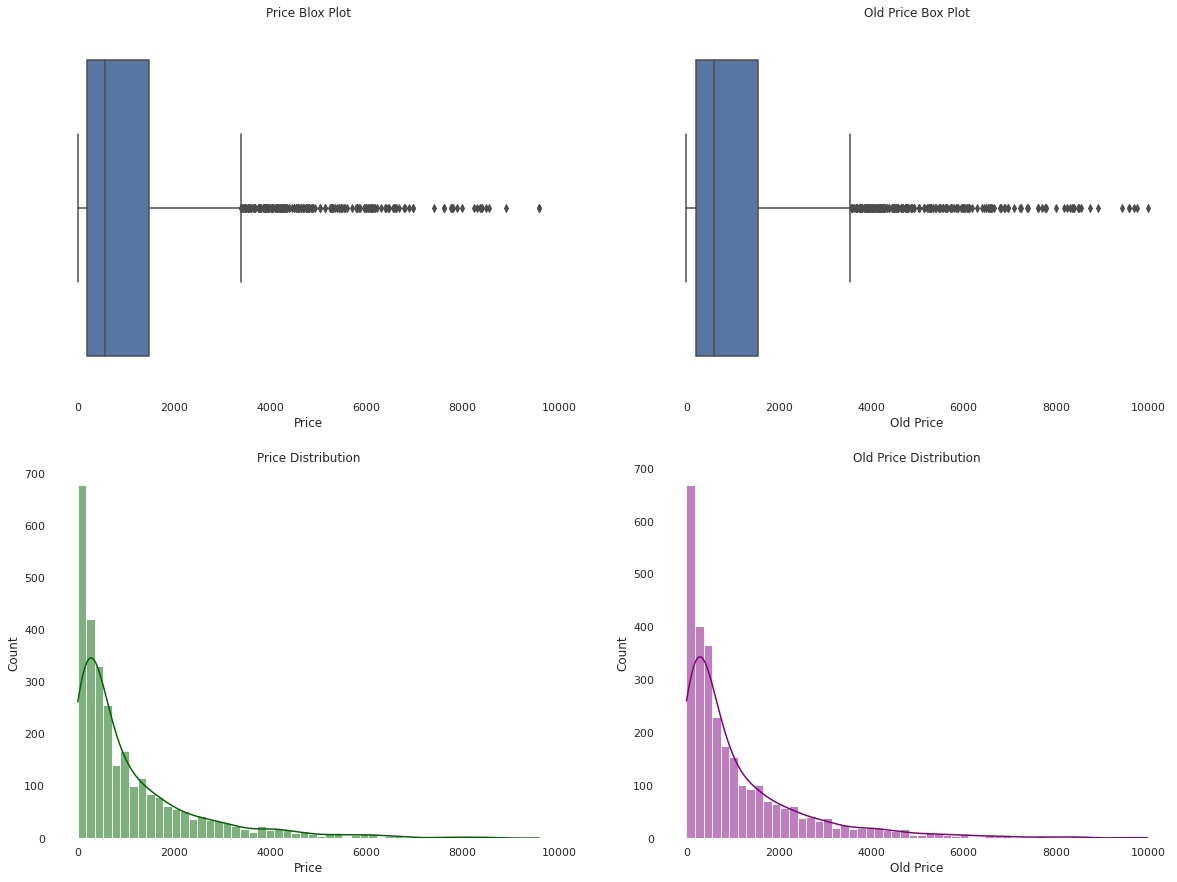

In [36]:
sns.set(style="white", font_scale=1)
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.boxplot(x=df['price'], ax=ax[0, 0])
sns.boxplot(x=df['old_price'], ax=ax[0, 1])
sns.histplot(x=df['price'], ax=ax[1,0], kde=True, color='darkgreen')
sns.histplot(x=df['old_price'], ax=ax[1,1], kde=True, color='purple')
sns.despine(bottom=True, left=True)
ax[0, 0].set(xlabel='Price', title='Price Blox Plot')
ax[0, 1].set(xlabel='Old Price', title='Old Price Box Plot')
ax[1, 0].set(xlabel='Price', title='Price Distribution')
ax[1, 1].set(xlabel='Old Price', title='Old Price Distribution')

plt.show()

Dari boxplot diatas baik variabel Price dan Old Price, dapat kita lihat bahwa terdapat outlier pada bagian kanan boxplot yang disertai dengan whisker bagian kanan yang lebih panjang. Sehingga dari boxplot tersebut menunjukkan bahwa distribusi data cenderung ke arah kanan (positif skewness). Asumsi tersebut juga didukung dengan grafik histogram.


> Volume (Depth, Height and Width)

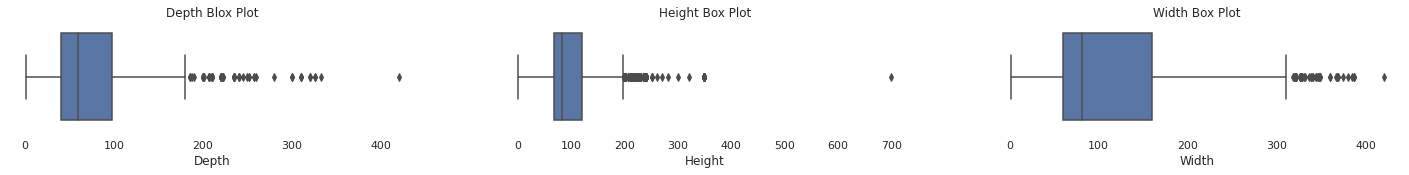

In [37]:
sns.set(style="white", font_scale=1)
f, ax = plt.subplots(1,3,figsize=(25,2))
sns.boxplot(x=df['depth'], ax=ax[0])
sns.boxplot(x=df['height'], ax=ax[1])
sns.boxplot(x=df['width'], ax=ax[2])
sns.despine(bottom=True, left=True)
ax[0].set(xlabel='Depth', title='Depth Blox Plot')
ax[1].set(xlabel='Height', title='Height Box Plot')
ax[2].set(xlabel='Width', title='Width Box Plot')
plt.show()

Dari boxplot diatas baik variabel depth, height dan width, dapat kita lihat bahwa terdapat outlier pada bagian kanan boxplot yang disertai dengan whisker bagian kanan yang lebih panjang. Sehingga dari boxplot tersebut menunjukkan bahwa distribusi data cenderung ke arah kanan (positif skewness).

> Category

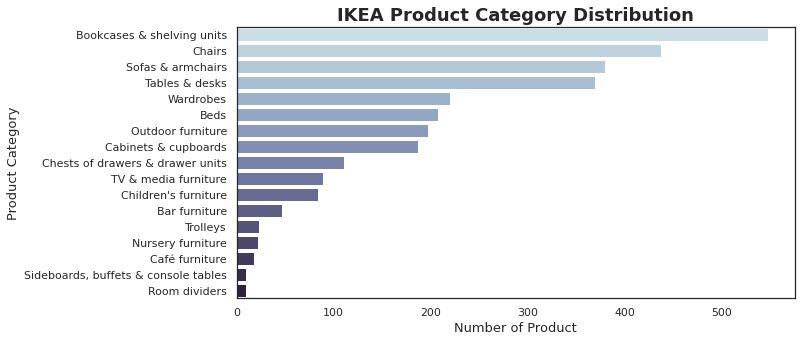

In [38]:
plt.figure(figsize=[10, 5])
ax = sns.countplot(y=df.category, order=df.category.value_counts().index, palette='ch:s=.25,rot=-.25')
plt.title('IKEA Product Category Distribution',fontsize=18, fontweight='bold')
plt.xlabel('Number of Product', fontsize=13)
plt.ylabel('Product Category', fontsize=13)
plt.show()

Dari grafik diatas terdapat 3 kategori dengan jumlah produk terbanyak yanga da di IKEA yaitu kategori Bookcases & shelving units, Chairs dan Sofas & armchairs

> Other Colors

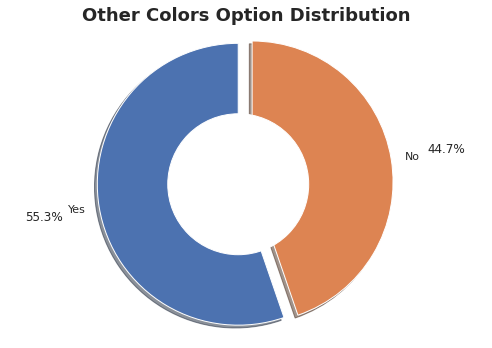

In [39]:
other_colors_or_no = df['other_colors'].value_counts()

# only "explode" 
explode = (0, 0.1)  

plt.figure(figsize=[7, 5])
plt.pie(other_colors_or_no, explode=explode, labels=['Yes', 'No'], autopct='%1.1f%%', pctdistance=1.4, shadow=True, startangle=90)
plt.title('Other Colors Option Distribution', fontsize = 18, fontweight='bold')

#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

Dapat dilihat bahwa produk di IKEA lebih banyak yang memiliki pilihan warna lain dibandingkan dengan produk yang tidak memiliki pilihan warna. 

> Sellable Online

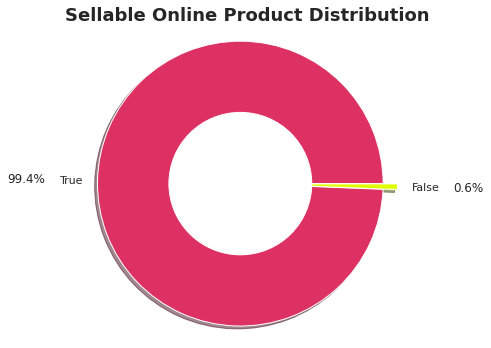

In [40]:
sellable_online_or_no = df['sellable_online'].value_counts()

colors = ['#DE3163', '#DFFF00']
# only "explode" 
explode = (0, 0.1)  

plt.figure(figsize=[7, 5])
plt.pie(sellable_online_or_no, explode=explode, labels=['True', 'False'], autopct='%1.1f%%', colors=colors, pctdistance=1.5, shadow=True)
plt.title('Sellable Online Product Distribution', fontsize = 18, fontweight='bold')

#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

Terlihat bahwa hampir semua produk yang ada di IKEA dijual secara online, hanya 0.6% dari total keseluruhan produk yang ada yang tidak dijual secara online.

Designer

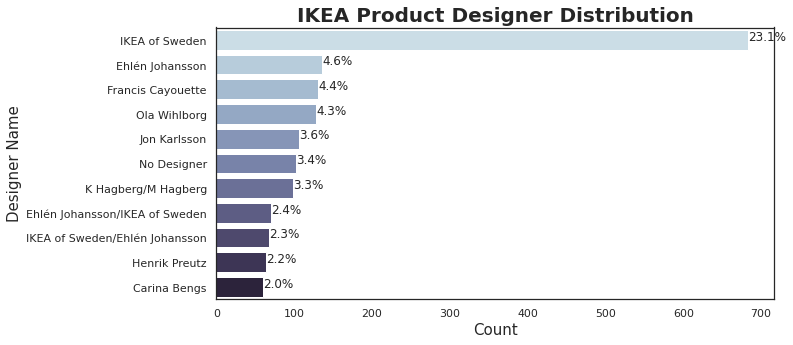

In [41]:
plt.figure(figsize=[10, 5])
ax = sns.countplot(y=df.designer, order=df.designer.value_counts()[0:11].index, palette='ch:s=.25,rot=-.25')
ax.set_title('IKEA Product Designer Distribution', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Count', fontsize=15)
ax.set_ylabel('Designer Name', fontsize=15)
total = len(df['designer'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

Berikut adalah 11 designer terbanyak yang mendesain produk di IKEA. Dapat dilihat bahwa mayoritas produk yang dijual adalah produk yang didesain oleh IKEA itu sendiri yaitu sekitar 23%.

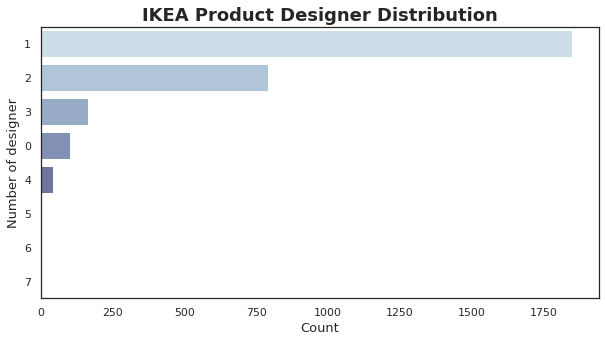

In [42]:
plt.figure(figsize=[10, 5])
sns.countplot(y=df.num_designer, order=df.num_designer.value_counts()[0:11].index, palette='ch:s=.25,rot=-.25')
plt.title('IKEA Product Designer Distribution',fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=13)
plt.ylabel('Number of designer', fontsize=13)
plt.show()

Terlihat juga bahwa kebanyaka barang yang dijual IKEA di design oleh satu orang. 

### Bivariate Exploration

> Price vs features

1. Price terhadap Old Price

Text(0.5, 1.0, 'Price vs Old Price ')

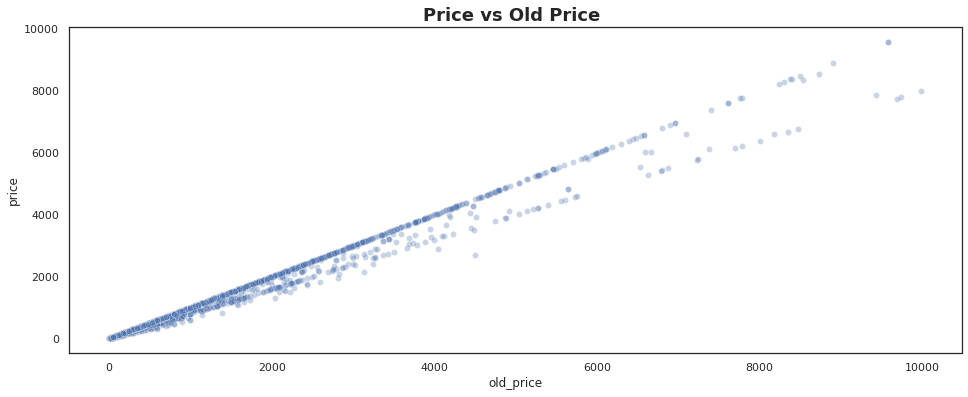

In [43]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=df, x="old_price", y="price", alpha=0.3);
plt.title('Price vs Old Price ', fontsize = 18, fontweight='bold')

Dapat dilihat bahwa semakin tinggi harga produk maka semakin tinggi juga harga diskonnya. Walaupun tidak berlaku untuk semua produk.

2. Price terhadap Categorical

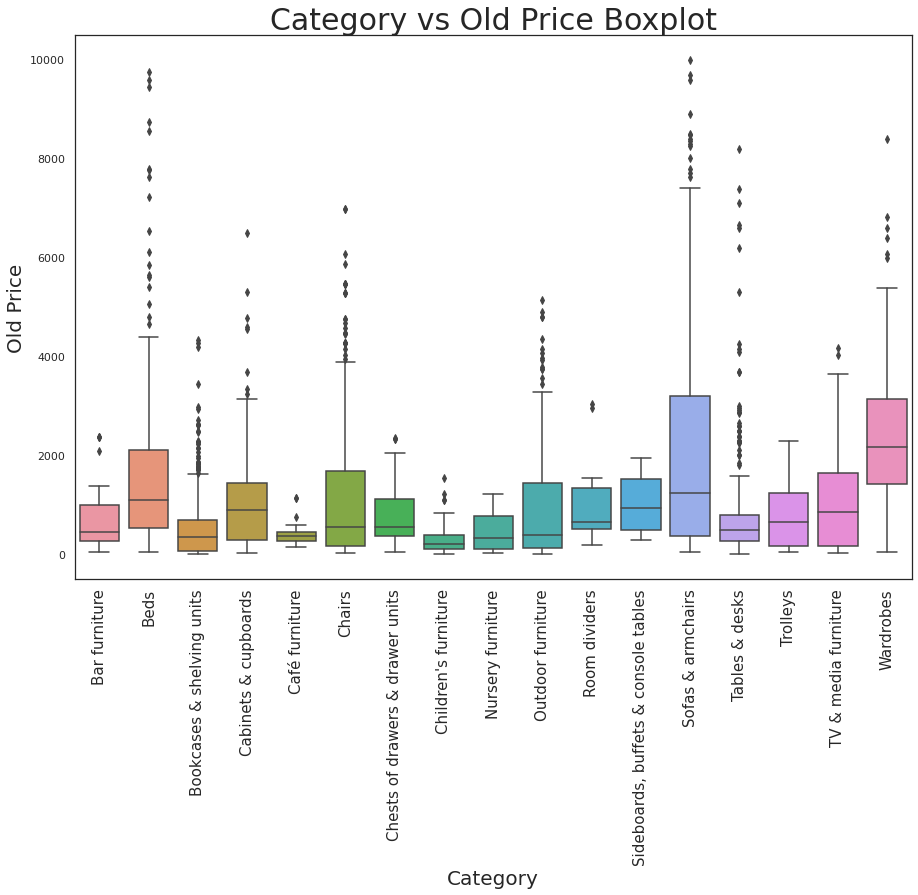

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['category'],y=df['old_price'])
plt.xlabel('Category', size=20)
plt.xticks(rotation=90, size=15)
plt.ylabel('Old Price', size=20)
plt.title('Category vs Old Price Boxplot', size=30)
plt.show()

Produk yang dijual di IKEA dikategorikan menjadi 17 kategori secara garis besar. Pada boxplot diatas dapat dilihat bahwa hampir seluruh kategori memiliki outlier dan data cenderung skew ke kanan. Terdapat beberapa kategori yang tidak memiliki outlier yaitu Nursery Furniture, Sideboards, buffets & console tables dan Trolleys

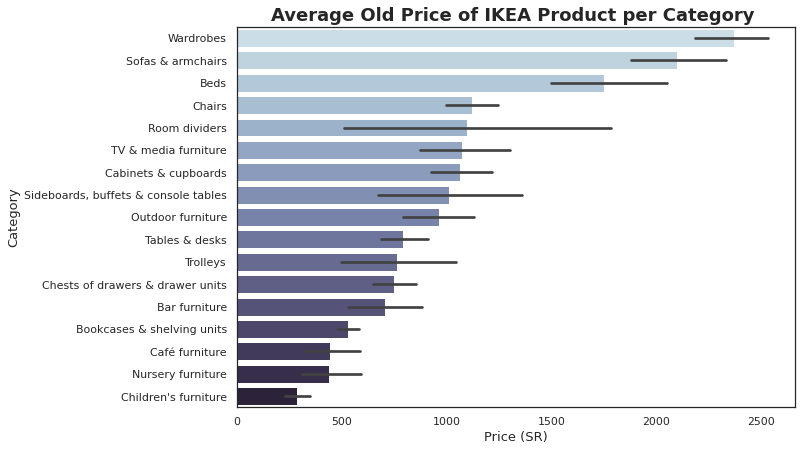

In [45]:
plt.figure(figsize=[10, 7])
result = df.groupby(["category"])['old_price'].aggregate(np.mean).reset_index().sort_values('old_price', ascending=False)
sns.barplot(data=df, y='category', x='old_price', order=result['category'], palette='ch:s=.25,rot=-.25')
plt.title('Average Old Price of IKEA Product per Category ', fontsize = 18, fontweight='bold')
plt.xlabel('Price (SR)', fontsize = 13)
plt.ylabel('Category', fontsize = 13)
plt.show()

Dari keseluruhan kategori produk yang ada, produk dengan kategori Wardrobes memiliki harga rata-rata yang paling tinggi.

3. Price terhadap Other color

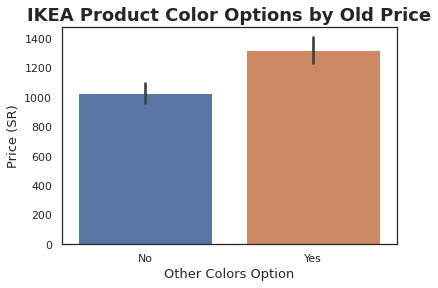

In [46]:
sns.barplot(x="other_colors", y="old_price", data=df)
plt.title('IKEA Product Color Options by Old Price', fontsize = 18, fontweight='bold')
plt.xlabel('Other Colors Option', fontsize = 13)
plt.ylabel('Price (SR)', fontsize = 13)
plt.show()

Dari grafik diatas terlihat bahwa produk yang memiliki pilihan warna cenderung lebih mahal dibandingkan dengan produk yang hanya memiliki 1 pilihan warna.

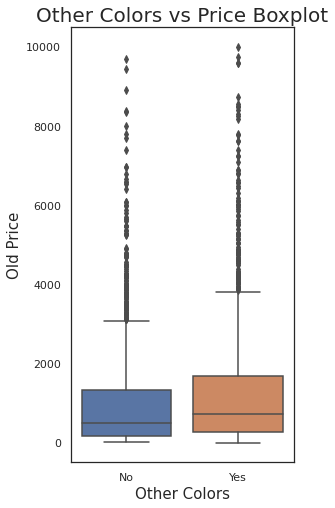

In [47]:
plt.figure(figsize=(4,8))
sns.boxplot(x=df['other_colors'],y=df['old_price'])
plt.xlabel('Other Colors', size=15)
plt.ylabel('Old Price', size=15)
plt.title('Other Colors vs Price Boxplot', size=20)
plt.show()

Pada boxplot diatas terlihat bahwa untuk produk yang memiliki warna lain ataupun tidak sama-sama memiliki banyak outlier dan distribusi data cenderung ke kanan. Dapat kita lihat juga bahwa produk yang memiliki warna lain rentang harganya cenderung lebih panjang dibanding dengan produk yang tidak memiliki warna lain.

4. price terhadap sellable online

Text(0.5, 1.0, 'IKEA Product Sellable Online by Old Price')

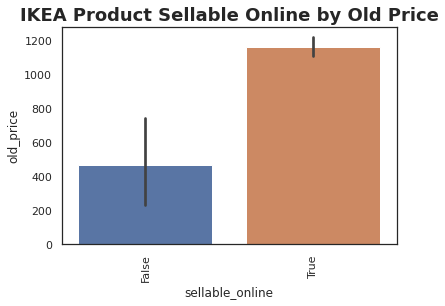

In [48]:
plt.figure(figsize=[6, 4])

sns.barplot(data=df, y='old_price', x='sellable_online')
plt.xticks(rotation=90);
plt.title('IKEA Product Sellable Online by Old Price', fontsize = 18, fontweight='bold')

Dari grafik diatas terlihat bahwa produk yang dijual secara online memiliki harga yang cenderung lebih mahal dibandingkan dengan produk yang tidak dijual secara online.

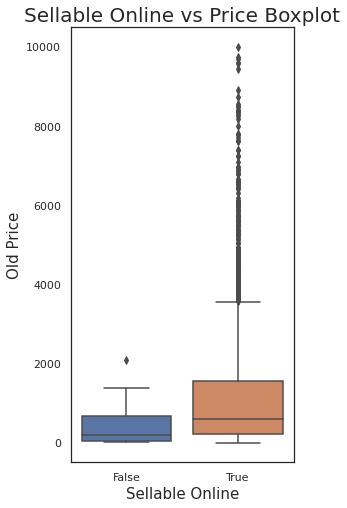

In [49]:
plt.figure(figsize=(4,8))
sns.boxplot(x=df['sellable_online'],y=df['old_price'])
plt.xlabel('Sellable Online', size=15)
plt.ylabel('Old Price', size=15)
plt.title('Sellable Online vs Price Boxplot', size=20)
plt.show()

Pada boxplot diatas dapat dilihat bahwa produk yang dijual secara online dan tidak dijual secara online sama-sama memiliki outlier, tetapi untuk produk yang dijual secara online memiliki lebih banyak outlier. Untuk produk yang dijual secara online memiliki harga penjualan lebih lebar dibandingkan dengan produk yang tidak dijual secara online, untuk distribusi data keduanya cenderung menjulur ke arah kanan (positif skewness)

5. measure dengan price

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Width (cm)'),
 Text(0.5, 1.0, 'Width vs Price Box Plot')]

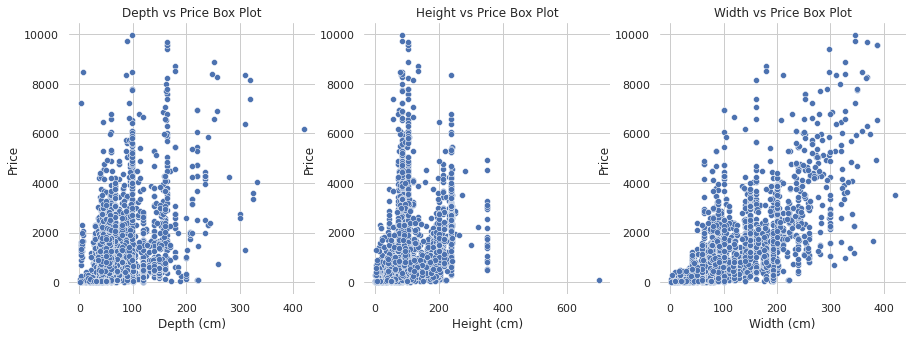

In [50]:
sns.set(style="whitegrid", font_scale=1)
f, ax = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(x=df['depth'],y=df['old_price'], ax=ax[0])
sns.scatterplot(x=df['height'],y=df['old_price'], ax=ax[1])
sns.scatterplot(x=df['width'],y=df['old_price'], ax=ax[2])
sns.despine(bottom=True, left=True)
ax[0].set(xlabel='Depth (cm)', ylabel='Price', title='Depth vs Price Box Plot')
ax[1].set(xlabel='Height (cm)', ylabel='Price', title='Height vs Price Box Plot')
ax[2].set(xlabel='Width (cm)', ylabel='Price', title='Width vs Price Box Plot')

Terlihat bahwa dari ketiga plot grafik, dimensi width yang paling menunjukan pola linear positif. 

6. Price vs designer

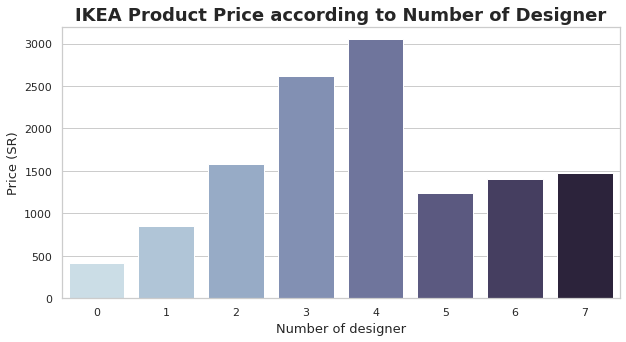

In [51]:
plt.figure(figsize=[10, 5])
result1 = df.groupby(["num_designer"])['old_price'].mean().reset_index().sort_values('old_price', ascending=False)

sns.barplot(data = result1, y = 'old_price', x='num_designer', palette='ch:s=.25,rot=-.25')
plt.title('IKEA Product Price according to Number of Designer',fontsize=18, fontweight='bold')
plt.ylabel('Price (SR)', fontsize=13)
plt.xlabel('Number of designer', fontsize=13)
plt.show()

Dari plot ini, terlihat bahwa trendnya semakin banyak designer yang mendesain sebuah furnitur maka harga furnitur juga semakin mahal. 

Meskipun pada jumlah lebih dari 4 designer, memiliki rata-rata harga lebih rendah

> Features vs features

1. Category by other colors

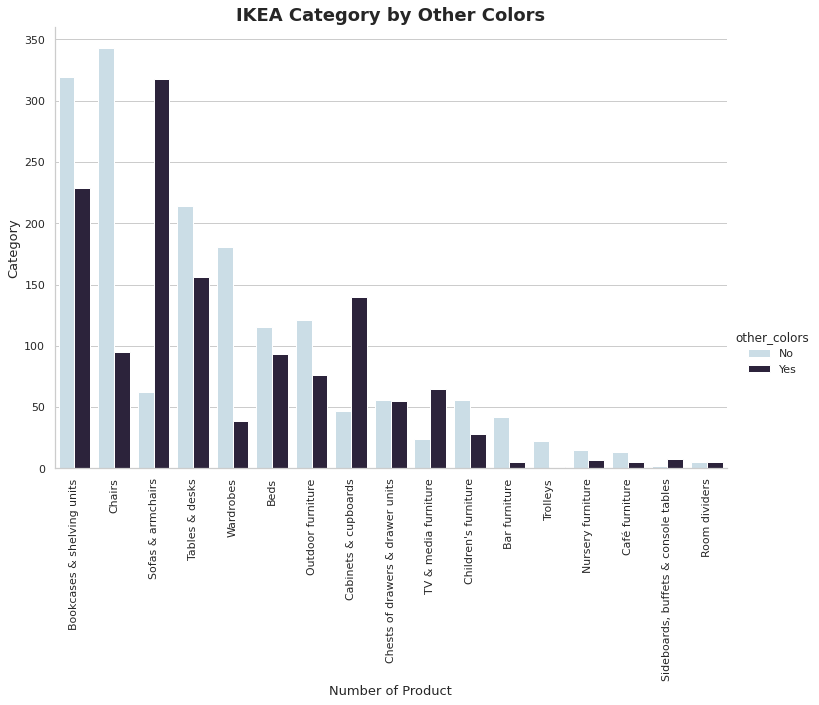

In [52]:
order = df['category'].value_counts().index
sns.catplot(data=df, x="category", hue='other_colors', kind="count", order=order, palette='ch:s=.25,rot=-.25', height=7, aspect=1.5)

plt.title('IKEA Category by Other Colors', fontsize = 18, fontweight='bold')
plt.xlabel('Number of Product', fontsize = 13)
plt.ylabel('Category', fontsize = 13)
plt.xticks(rotation=90)
plt.show()

kategori produk yang dapat memilih warna rata-rata lebih banyak produknya pada kategori sofas & armchairs, TV & media furnitures, dan sideboards, buffets & console table. sedangkan pada kategori sisanya rata-rata lebih banyak yang hanya 1 warna.

2. Category Vs Sellable Online

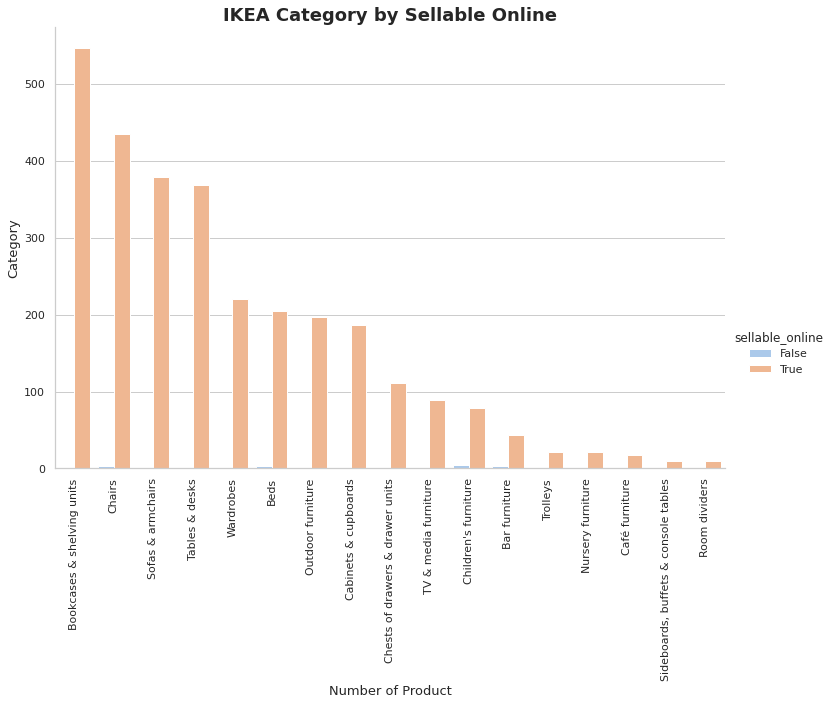

In [53]:
order = df['category'].value_counts().index
sns.catplot(data=df, x="category", hue='sellable_online', kind="count", order=order, palette='pastel', height=7, aspect=1.5)

plt.title('IKEA Category by Sellable Online', fontsize = 18, fontweight='bold')
plt.xlabel('Number of Product', fontsize = 13)
plt.ylabel('Category', fontsize = 13)
plt.xticks(rotation=90)
plt.show()

Terlihat bahwa produk dari seluruh kategori cenderung dijual secara online. Pada grafik hanya produk dari beberapa kategori yang terlihat tidak dijual melalui online, yaitu Chairs, Beds, Children's Furniture dan Bar Furniture.

3. Height vs depth

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


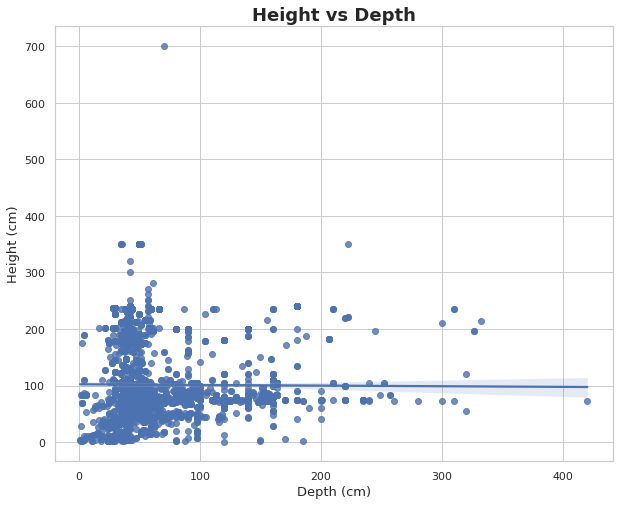

In [54]:
plt.figure(figsize=[10, 8])
sns.regplot("depth", "height", data=df)
plt.title('Height vs Depth', fontsize = 18, fontweight='bold')
plt.xlabel('Depth (cm)', fontsize = 13)
plt.ylabel('Height (cm)', fontsize = 13)
plt.show()

4. Width vs depth

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


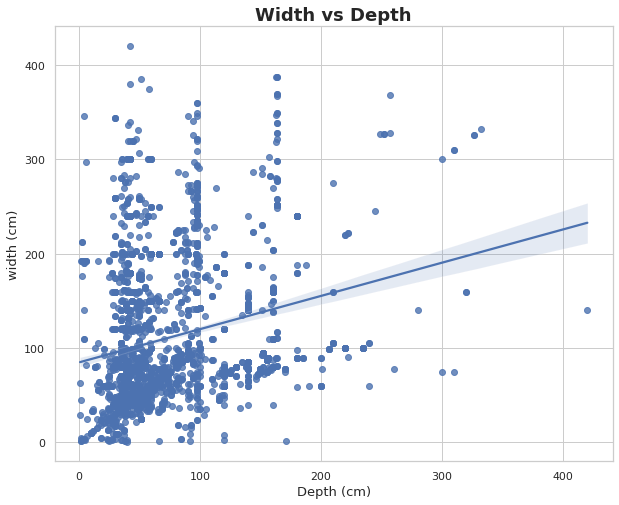

In [55]:
plt.figure(figsize=[10, 8])
sns.regplot("depth", "width", data=df)
plt.title('Width vs Depth', fontsize = 18, fontweight='bold')
plt.xlabel('Depth (cm)', fontsize = 13)
plt.ylabel('width (cm)', fontsize = 13)
plt.show()

5. Width vs Height

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


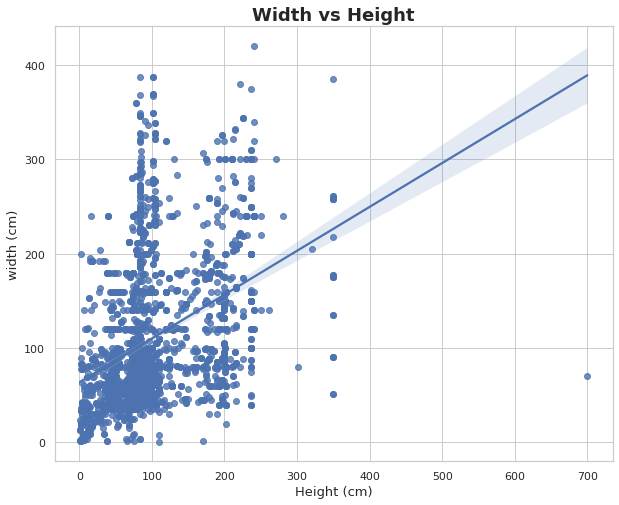

In [56]:
plt.figure(figsize=[10, 8])
sns.regplot("height", "width", data=df)
plt.title('Width vs Height', fontsize = 18, fontweight='bold')
plt.xlabel('Height (cm)', fontsize = 13)
plt.ylabel('width (cm)', fontsize = 13)
plt.show()

### Correlation


In [57]:
df.corr(method = 'spearman')

,price,old_price,sellable_online,num_designer,depth,height,width
price,1.000000,0.997281,0.050082,0.372382,0.377987,0.527805,0.690555
old_price,0.997281,1.000000,0.051316,0.370400,0.377217,0.529279,0.692404
sellable_online,0.050082,0.051316,1.000000,0.039098,0.038327,0.003060,0.058352
num_designer,0.372382,0.370400,0.039098,1.000000,0.186082,0.193685,0.168993
depth,0.377987,0.377217,0.038327,0.186082,1.000000,0.041244,0.266675
height,0.527805,0.529279,0.003060,0.193685,0.041244,1.000000,0.494686
width,0.690555,0.692404,0.058352,0.168993,0.266675,0.494686,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


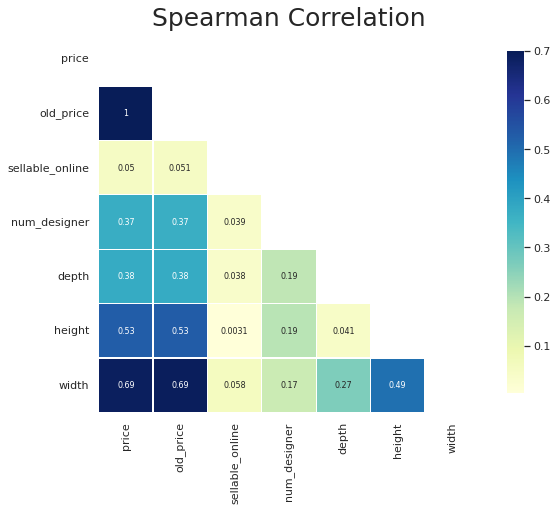

In [58]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 7))
plt.title('Spearman Correlation', fontsize=25)

sns.heatmap(df.corr(method='spearman'), linewidth=0.25, vmax=0.7, square=True, cmap='YlGnBu', 
           linecolor='w', annot=True, annot_kws={'size': 8}, mask=mask, cbar_kws={'shrink': .9})

hasil uji korelasi dengan spearman menunjukkan bahwa old price memiliki korelasi yang lebih tinggi dengan width, height, dan depth (dimensi) serta fitur jumlah designer('num_designer'). 

Hal ini menunjukkan ukuran dimensi dan jumlah designer memiliki hubungan yang lebih dengan harga produk

### Multicolinearity Cek

In [59]:
x = df[['num_designer','depth','height','width']]
def calc_vif(x):
    vif = pd.DataFrame() 
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

calc_vif(x)

,variables,VIF
0,num_designer,3.722003
1,depth,3.278322
2,height,3.784944
3,width,4.067611


Tidak ada indikasi dari multikolinearitas, karena nilai VIF masih di bawah batas yang diterima.

# Analisis Residual

Sebelum menentukan model, sebelumnya kami akan mencoba untuk melakukan multiple linear regression untuk menguji analisis residual, agar dapat mengetahui pemilihan model yang tepat.

In [60]:
import statsmodels.api as sm

y = df['old_price']                       
X = df.drop(columns = ['price', 'old_price', 'designer', 'description'])
X = pd.get_dummies(X, columns=['category','sellable_online','other_colors'], drop_first=True)
X = sm.add_constant(X)                  

model = sm.OLS(y, X)                   
result = model.fit()                   
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              old_price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     187.0
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:59:50   Log-Likelihood:                -24509.
No. Observations:                2962   AIC:                         4.906e+04
Df Residuals:                    2939   BIC:                         4.920e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Model Diagnostic and Multicollinearity

> Normalitas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


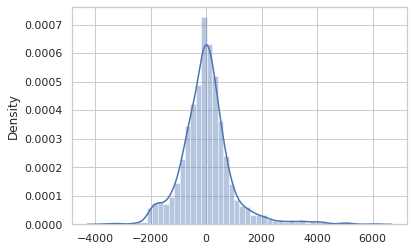

In [61]:
sns.distplot(result.resid)

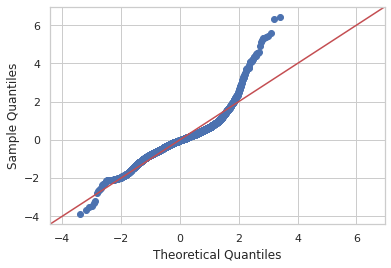

In [62]:
import scipy.stats as stats

sm.qqplot(result.resid, stats.norm ,fit=True, line='45')
plt.show()

In [63]:
from scipy.stats import shapiro

shapiro(result.resid)

(0.9087188839912415, 5.960822388067942e-39)

Setelah dilakukan uji normalitas untuk residual dengan visualisasi melalui diagram histogram dan qq-plot serta didukung dengan uji Shapiro Wilk, ternyata residual berdistribusi tidak normal, dari diagram terlihat bahwa data cenderung skew ke kanan dan nilai dari p-value < 0.05.

> ASUMSI GAUSS-MARKOV

1. Rataan error = 0
1. error tidak saling berkorelasi (membentuk pola)
1. Homoscedastisitas, ragam error homogen

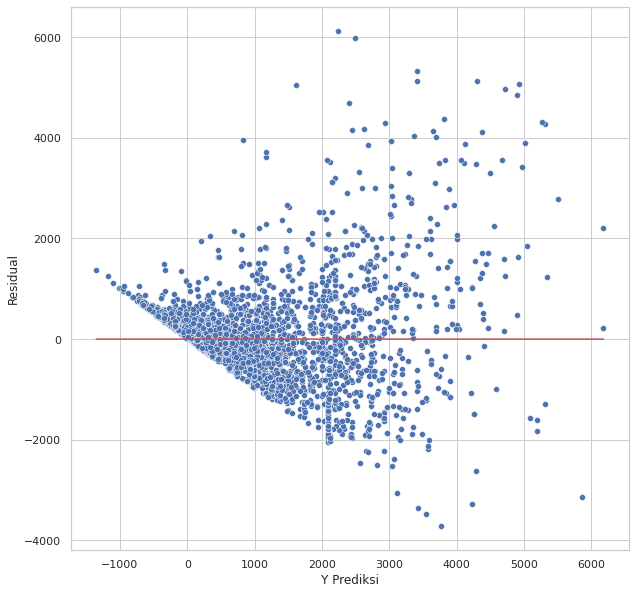

In [64]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= result.fittedvalues, y= result.resid) # x = y prediksi, y=residual
sns.lineplot(x= result.fittedvalues, y=0, color='r')
plt.xlabel('Y Prediksi')
plt.ylabel('Residual')
plt.show()

Hasil pengujian asumsi Gauss-Markov

1. Rataan error = 0 --> tidak terpenuhi, karena jumlah error yang berada di atas garis merah atau 0 > dari data yang berada di bawah 0
1. error tidak saling berkorelasi (membentuk pola) --> terpenuhi, karena error tersebar dan tidak membentuk suatu pola tertentu
1. Homoscedastisitas, ragam error homogen --> tidak terpenuhi, karena varians tidak seragam, semakin besar nilai y pred maka rror akan semakin melebar (model tidak mampu memprediksi dengan baik nilai y yang besar)

> Residual Analisis --> Log

Karena hasil dari diagnosa analisis residual menunjukan bahwa residual tidak terdistribusi normal, maka kami akan mencoba untuk memanipulasi target dengan mengubah ke dalam bentuk logaritmik

In [65]:
y_log = np.log(y)

model_log = sm.OLS(y_log, X)                   
result_log = model_log.fit()                   
print(result_log.summary())

                            OLS Regression Results                            
Dep. Variable:              old_price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     211.1
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:00:15   Log-Likelihood:                -3877.1
No. Observations:                2962   AIC:                             7800.
Df Residuals:                    2939   BIC:                             7938.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

> Normalitas - Log

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


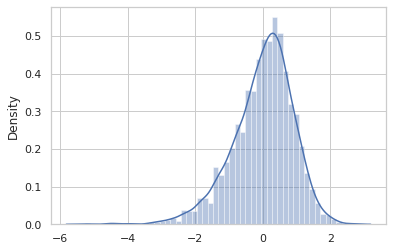

In [66]:
sns.distplot(result_log.resid)

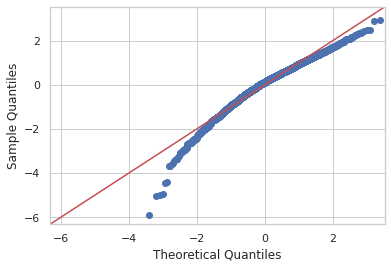

In [67]:
sm.qqplot(result_log.resid, stats.norm ,fit=True, line='45')
plt.show()

In [68]:
shapiro(result_log.resid)

(0.97137850522995, 6.857797407609675e-24)

Setelah target dimanipulasi menjadi bentuk logaritmik ternyata hasil dari uji normalitas untuk residual dengan visualisasi melalui diagram histogram dan qq-plot serta didukung dengan uji Shapiro Wilk, residual berdistribusi tidak normal, dari diagram terlihat bahwa data cenderung skew ke kiri dan nilai dari p-value < 0.05.

> ASUMSI GAUSS-MARKOV - Log

1. Rataan error = 0
1. error tidak saling berkorelasi (membentuk pola)
1. Homoscedastisitas, ragam error homogen

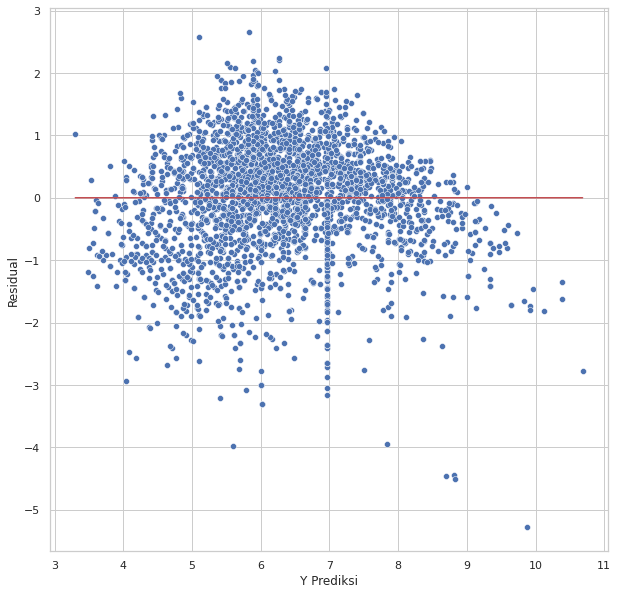

In [69]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= result_log.fittedvalues, y = result_log.resid) # x = y prediksi, y=residual
sns.lineplot(x= result_log.fittedvalues, y=0, color='r')
plt.xlabel('Y Prediksi')
plt.ylabel('Residual')
plt.show()

Hasil pengujian asumsi Gauss-Markov

1. Rataan error = 0 --> tidak terpenuhi, karena jumlah error yang berada di atas garis merah atau 0 < dari data yang berada di bawah 0
1. error tidak saling berkorelasi (membentuk pola) --> terpenuhi, karena error tersebar dan tidak membentuk suatu pola tertentu
1. Homoscedastisitas, ragam error homogen --> tidak terpenuhi, karena varians tidak seragam.

> Multicollinearity

In [70]:
def calc_vif(X):
    vif = pd.DataFrame()            
    vif['variabel'] = X.columns     
    vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
    return vif

In [71]:
calc_vif(X.drop(columns='const')   )

,variabel,vif
0,num_designer,5.178113
1,depth,5.736601
2,height,6.762534
3,width,6.225426
4,category_Beds,4.625526
5,category_Bookcases & shelving units,10.529324
6,category_Cabinets & cupboards,4.353927
7,category_Café furniture,1.308783
8,category_Chairs,8.423765
9,category_Chests of drawers & drawer units,2.904758


Ada indikasi dari multikolinearitas, ditandakan dengan nilai VIF banyak yang lebih dari 4.

> Kesimpulan:

- Hasil dari diagnosa residual analisis dengan nilai dari old_price original (nilai sesungguhnya) adalah residual berdistribusi tidak normal dan tidak memenuhi asumsi Gauss-Markov.
- Setelah dilakukan manipulasi dengan merubah nilai old_price menjadi nilai logaritmik, hasil dari diagnosa residual analisis menunjukkan bahwa residual tidak berdistribusi normal.

Sehingga model machine learning yang bagus untuk digunakan adalah model non linear

# Modeling

- target = old_price
- features = category, other_colors, num_designer, depth, height, width
- further data preparation =
  - binary encoding for category
  - onehot untuk other_colors
  - scaling dengan robust scaler
- data splitting = 80:20
- Hyperparameter tuning with RandomizedSearchCV
- Model evaluation:
    - RMSE
    - MAE
    - MSE
- Model benchmark:
    - Decision tree regressor
    - Random forest regressor
    - KNN regressor
    - XGboost regressor

### 1. Data Splitting

In [72]:
df

,category,price,old_price,sellable_online,other_colors,designer,num_designer,depth,height,width,description
0,Bar furniture,265.0,265.0,True,No,Nicholai Wiig Hansen,1,51.0,99.0,51.0,Bar table
1,Bar furniture,995.0,995.0,False,No,Francis Cayouette,1,140.0,105.0,80.0,Bar table
2,Bar furniture,2095.0,2095.0,False,No,Francis Cayouette,1,51.0,102.0,50.0,Bar table and 4 bar stools
3,Bar furniture,69.0,69.0,True,Yes,Henrik Preutz,1,50.0,100.0,60.0,Bar stool with backrest
4,Bar furniture,225.0,225.0,True,No,Marcus Arvonen,1,60.0,43.0,74.0,Wall-mounted drop-leaf table
...,...,...,...,...,...,...,...,...,...,...,...
3688,Wardrobes,2045.0,2045.0,True,No,IKEA of Sweden/Ehlén Johansson,2,66.0,236.0,200.0,Wardrobe combination
3689,Wardrobes,750.0,820.0,True,No,Ehlén Johansson,1,50.0,350.0,91.0,1 section
3690,Wardrobes,1572.0,1755.0,True,No,Ehlén Johansson,1,50.0,350.0,135.0,2 sections
3691,Wardrobes,924.0,1050.0,True,No,Ehlén Johansson,1,50.0,350.0,175.0,2 sections


In [73]:
#memisahkan target dan features
X = df.drop(columns = ['price', 'old_price', 'designer', 'sellable_online', 'description'])
y = df['old_price']


In [74]:
#Splitting data dengan komposisi 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2,
    random_state = 0)

### 2. Preprocessing

In [75]:
#Melakukan encoding untuk data kategorikal
transformer = ColumnTransformer([   
    ('onehot', OneHotEncoder(), ['other_colors']), 
    ('binary encoder', ce.BinaryEncoder(), ['category'])
], remainder = 'passthrough')

#scaling data
scaler = RobustScaler()

### 3. Model Evaluation

In [76]:
#Define model
DT = DecisionTreeRegressor(random_state = 0)
RF = RandomForestRegressor(random_state = 0)
KR = KNeighborsRegressor()
XGR = XGBRegressor(random_state = 0)

3a. MAE

In [77]:
models = [DT, RF, KR, XGR]
score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

for i in models:
    
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
        ])

    model_cv = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv, i)


    score_mae.append(model_cv)
    nilai_mean_mae.append(model_cv.mean())
    nilai_std_mae.append(model_cv.std())

[-528.11940426 -449.38330168 -534.1684186  -434.93441348 -507.53866705] DecisionTreeRegressor(random_state=0)
[-417.6351559  -408.3299945  -424.96907038 -379.33927379 -424.44647596] RandomForestRegressor(random_state=0)
[-471.27257384 -471.95864979 -509.15822785 -412.72911392 -490.28414376] KNeighborsRegressor()
[15:00:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[-460.95067702 -414.57671594 -478.88898581 -432.764

In [78]:
pd.DataFrame({
    'model_mae':['Tree', 'RandomForest', 'KNN', 'XGBoost'],
    'mean':nilai_mean_mae,
    'std':nilai_std_mae
})

,model_mae,mean,std
0,Tree,-490.828841,40.963504
1,RandomForest,-410.943994,16.908476
2,KNN,-471.080542,32.324559
3,XGBoost,-451.205144,23.892480


3b. MSE

In [79]:
models = [DT, RF, KR, XGR]
score_mse = []
nilai_mean_mse = []
nilai_std_mse = []

for i in models:
    
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
        ])

    model_cv = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv, i)


    score_mse.append(model_cv)
    nilai_mean_mse.append(model_cv.mean())
    nilai_std_mse.append(model_cv.std())

[-1082528.97237857  -652954.18082536  -998513.77631831  -604250.23564042
  -895092.54545685] DecisionTreeRegressor(random_state=0)
[-572043.02733225 -534401.66040396 -700468.56027288 -405380.70272472
 -525400.23587267] RandomForestRegressor(random_state=0)
[-676409.94312236 -635745.45535865 -858888.82995781 -441690.06902954
 -739347.04913319] KNeighborsRegressor()
[15:00:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror

In [80]:
pd.DataFrame({
    'model_mse':['Tree', 'RandomForest', 'KNN', 'XGBoost'],
    'mean':nilai_mean_mse,
    'std':nilai_std_mse
})

,model_mse,mean,std
0,Tree,-846667.942124,188320.944611
1,RandomForest,-547538.837321,94720.213063
2,KNN,-670416.269320,136986.877244
3,XGBoost,-560759.408889,89560.589791


3c. RMSE

In [81]:
models = [DT, RF, KR, XGR]
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

for i in models:
    
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
        ])

    model_cv = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv, i)


    score_rmse.append(model_cv)
    nilai_mean_rmse.append(model_cv.mean())
    nilai_std_rmse.append(model_cv.std())

[-1040.44652548  -808.05580304  -999.25661185  -777.33534311
  -946.09330695] DecisionTreeRegressor(random_state=0)
[-756.3352612  -731.02781096 -836.93999801 -636.69514112 -724.84497368] RandomForestRegressor(random_state=0)
[-822.4414527  -797.33647562 -926.76255317 -664.59767456 -859.85292297] KNeighborsRegressor()
[15:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[-767.76713546 -686.8284223  -844.2760673  -6

In [82]:
pd.DataFrame({
    'model_rmse':['Tree', 'RandomForest', 'KNN', 'XGBoost'],
    'mean':nilai_mean_rmse,
    'std':nilai_std_rmse
})

,model_rmse,mean,std
0,Tree,-914.237518,104.104287
1,RandomForest,-737.168637,64.196869
2,KNN,-814.198216,86.588306
3,XGBoost,-746.526318,58.803622


> Summary

In [83]:
eval_score = pd.DataFrame({
    'model':['Tree', 'RandomForest', 'KNN', 'XGBoost'],
    'mean_mae':nilai_mean_mae,
    'std_mae':nilai_std_mae, 
    'mean_mse':nilai_mean_mse,
    'std_mse':nilai_std_mse,
    'mean_rmse':nilai_mean_rmse,
    'std_rmse':nilai_std_rmse  
})

eval_score.sort_values(by=['mean_mae', 'mean_mse', 'mean_rmse'], ascending=[False, False, False])

,model,mean_mae,std_mae,mean_mse,std_mse,mean_rmse,std_rmse
1,RandomForest,-410.943994,16.908476,-547538.837321,94720.213063,-737.168637,64.196869
3,XGBoost,-451.205144,23.892480,-560759.408889,89560.589791,-746.526318,58.803622
2,KNN,-471.080542,32.324559,-670416.269320,136986.877244,-814.198216,86.588306
0,Tree,-490.828841,40.963504,-846667.942124,188320.944611,-914.237518,104.104287


Terdapat perbedaan cukup signifikan antara nilai MAE dan RMSE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' atau beban yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai MAE, MSE dan RMSE RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu RandomForest dan XGBoost. 

### Prediksi Test Set Pada Model Benchmark (XGBoost Regressor dan RandomForestRegressor)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=0),
    'RandomForest': RandomForestRegressor(random_state=0)
}

score_mae = []
score_mse = []
score_rmse = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mse.append(mean_squared_error(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))


score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MSE': score_mse, 'RMSE': score_rmse}, index=models.keys())
score_before_tuning

[15:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,RMSE
XGB,447.599127,509146.726142,713.545182
RandomForest,360.092691,373240.996947,610.934528


Setelah dilakukan pengujian pada test set, ternyata performa dari model dengan RandomForest menunjukkan hasil yang lebih baik. Terlihat dari nilai MAE, MSE maupun RMSE yang lebih kecil.

### Hyperparameter Tuning

Selanjutnya kami akan melakukan hyperparameter tuning untuk kedua model dengan harapan performa model akan menjadi lebih baik.

> XGBoost Regressor

In [85]:
from sklearn.model_selection import StratifiedKFold

# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0)

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth':list(np.arange(1,20)),
    'model__n_estimator':list(np.arange(100,1000,100)),
    'model__learning_rate':list(np.arange(1, 100)/100),
    'model__colsample_bytree':list(np.arange(1, 10)/10),
    'model__subsample':list(np.arange(2, 10)/10)
}

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 100,
    cv = 5, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0 
)

In [86]:
# Fitting data training untuk mencari parameter terbaik

random_xgb.fit(X_train, y_train)

[15:02:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['other_colors']),
                                                                              ('binary '
                                                                               'encoder',
                                                                               BinaryEncoder(),
                                                                               ['category'])])),
                                             ('scaler', RobustScaler()),
                                             ('model', XGBRegressor())]),
                   n_it

In [87]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAE

pd.DataFrame(random_xgb.cv_results_).sort_values(by='rank_test_neg_mean_absolute_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimator,param_model__max_depth,param_model__learning_rate,param_model__colsample_bytree,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
47,0.887706,0.013412,0.022663,0.001713,0.6,700,14,0.08,0.9,"{'model__subsample': 0.6, 'model__n_estimator'...",-408.522694,-398.757629,-413.770726,-361.891639,-405.452477,-397.679033,18.541062,1,-547109.276763,-524576.646554,-706826.895335,-376495.513277,-480938.030808,-527189.272547,107257.721725,5,-739.668356,-724.276637,-840.729978,-613.592302,-693.496958,-722.352846,73.455008,4
31,1.059722,0.007392,0.023972,0.000549,0.5,400,18,0.11,0.9,"{'model__subsample': 0.5, 'model__n_estimator'...",-400.327591,-396.620639,-428.164387,-380.677061,-410.617110,-403.281358,15.729098,2,-506473.594449,-526978.571681,-738534.675784,-404066.267471,-484962.674590,-532203.156795,111276.887053,6,-711.669582,-725.932898,-859.380402,-635.662070,-696.392615,-725.807514,73.529655,6
99,0.859548,0.013703,0.025141,0.003717,0.5,100,17,0.19,0.7,"{'model__subsample': 0.5, 'model__n_estimator'...",-393.085656,-406.197263,-418.027443,-367.823390,-432.364610,-403.499672,22.057954,3,-477230.061526,-550303.380280,-702057.595926,-386694.029551,-575727.503185,-538402.514093,104952.660254,8,-690.818400,-741.824359,-837.888773,-621.847272,-758.767094,-730.229180,71.887824,7
58,1.198693,0.313838,0.027886,0.001525,0.9,800,18,0.22,0.8,"{'model__subsample': 0.9, 'model__n_estimator'...",-422.026393,-399.938762,-425.992563,-361.102118,-414.966950,-404.805357,23.589729,4,-572854.186335,-543655.501572,-739515.417819,-382701.575836,-535965.165439,-554938.369400,113615.546411,13,-756.871314,-737.329981,-859.950823,-618.628787,-732.096418,-740.975465,76.770633,13
11,0.386066,0.009734,0.015939,0.000328,0.6,500,7,0.2,0.7,"{'model__subsample': 0.6, 'model__n_estimator'...",-420.663262,-395.911720,-419.952083,-383.732309,-415.117402,-407.075355,14.728479,5,-553397.140606,-498232.520424,-688142.083444,-399405.878197,-491065.461153,-526048.616765,94929.630064,4,-743.906675,-705.855878,-829.543298,-631.985663,-700.760630,-722.410429,64.589388,5


In [88]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MSE

pd.DataFrame(random_xgb.cv_results_).sort_values(by='rank_test_neg_mean_squared_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimator,param_model__max_depth,param_model__learning_rate,param_model__colsample_bytree,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
29,0.446704,0.012768,0.018653,0.000509,0.3,200,12,0.11,0.5,"{'model__subsample': 0.3, 'model__n_estimator'...",-413.862781,-386.159815,-439.213971,-401.709132,-421.709139,-412.530968,17.947396,7,-507209.039797,-463871.577214,-635449.265911,-407579.454178,-518157.844607,-506453.436341,75321.666513,1,-712.186099,-681.081183,-797.150717,-638.419497,-719.831817,-709.733863,52.261656,1
76,0.269789,0.004218,0.014394,0.000217,0.7,100,5,0.11,0.7,"{'model__subsample': 0.7, 'model__n_estimator'...",-434.866829,-399.533514,-431.292817,-383.138738,-426.006569,-414.967694,20.177405,9,-541497.252170,-480160.215646,-661542.007533,-381301.774911,-484380.083569,-509776.266766,91724.405311,2,-735.864969,-692.935939,-813.352327,-617.496376,-695.974197,-711.124762,63.857968,2
2,0.301494,0.007993,0.015532,0.000918,0.5,500,5,0.12,0.8,"{'model__subsample': 0.5, 'model__n_estimator'...",-439.111784,-406.448843,-435.353765,-412.773925,-430.674740,-424.872611,12.900285,13,-546646.271790,-495683.846217,-658293.780331,-423253.397104,-486747.807249,-522125.020538,78574.173552,3,-739.355308,-704.048185,-811.353055,-650.579278,-697.673138,-720.601793,53.460983,3
11,0.386066,0.009734,0.015939,0.000328,0.6,500,7,0.2,0.7,"{'model__subsample': 0.6, 'model__n_estimator'...",-420.663262,-395.911720,-419.952083,-383.732309,-415.117402,-407.075355,14.728479,5,-553397.140606,-498232.520424,-688142.083444,-399405.878197,-491065.461153,-526048.616765,94929.630064,4,-743.906675,-705.855878,-829.543298,-631.985663,-700.760630,-722.410429,64.589388,5
47,0.887706,0.013412,0.022663,0.001713,0.6,700,14,0.08,0.9,"{'model__subsample': 0.6, 'model__n_estimator'...",-408.522694,-398.757629,-413.770726,-361.891639,-405.452477,-397.679033,18.541062,1,-547109.276763,-524576.646554,-706826.895335,-376495.513277,-480938.030808,-527189.272547,107257.721725,5,-739.668356,-724.276637,-840.729978,-613.592302,-693.496958,-722.352846,73.455008,4


In [89]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE

pd.DataFrame(random_xgb.cv_results_).sort_values(by='rank_test_neg_root_mean_squared_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimator,param_model__max_depth,param_model__learning_rate,param_model__colsample_bytree,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
29,0.446704,0.012768,0.018653,0.000509,0.3,200,12,0.11,0.5,"{'model__subsample': 0.3, 'model__n_estimator'...",-413.862781,-386.159815,-439.213971,-401.709132,-421.709139,-412.530968,17.947396,7,-507209.039797,-463871.577214,-635449.265911,-407579.454178,-518157.844607,-506453.436341,75321.666513,1,-712.186099,-681.081183,-797.150717,-638.419497,-719.831817,-709.733863,52.261656,1
76,0.269789,0.004218,0.014394,0.000217,0.7,100,5,0.11,0.7,"{'model__subsample': 0.7, 'model__n_estimator'...",-434.866829,-399.533514,-431.292817,-383.138738,-426.006569,-414.967694,20.177405,9,-541497.252170,-480160.215646,-661542.007533,-381301.774911,-484380.083569,-509776.266766,91724.405311,2,-735.864969,-692.935939,-813.352327,-617.496376,-695.974197,-711.124762,63.857968,2
2,0.301494,0.007993,0.015532,0.000918,0.5,500,5,0.12,0.8,"{'model__subsample': 0.5, 'model__n_estimator'...",-439.111784,-406.448843,-435.353765,-412.773925,-430.674740,-424.872611,12.900285,13,-546646.271790,-495683.846217,-658293.780331,-423253.397104,-486747.807249,-522125.020538,78574.173552,3,-739.355308,-704.048185,-811.353055,-650.579278,-697.673138,-720.601793,53.460983,3
47,0.887706,0.013412,0.022663,0.001713,0.6,700,14,0.08,0.9,"{'model__subsample': 0.6, 'model__n_estimator'...",-408.522694,-398.757629,-413.770726,-361.891639,-405.452477,-397.679033,18.541062,1,-547109.276763,-524576.646554,-706826.895335,-376495.513277,-480938.030808,-527189.272547,107257.721725,5,-739.668356,-724.276637,-840.729978,-613.592302,-693.496958,-722.352846,73.455008,4
11,0.386066,0.009734,0.015939,0.000328,0.6,500,7,0.2,0.7,"{'model__subsample': 0.6, 'model__n_estimator'...",-420.663262,-395.911720,-419.952083,-383.732309,-415.117402,-407.075355,14.728479,5,-553397.140606,-498232.520424,-688142.083444,-399405.878197,-491065.461153,-526048.616765,94929.630064,4,-743.906675,-705.855878,-829.543298,-631.985663,-700.760630,-722.410429,64.589388,5


In [90]:
# Cek skor dan params terbaik

print('XGBoost Regressor')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost Regressor
Best_score: -397.6790329781473
Best_params: {'model__subsample': 0.6, 'model__n_estimator': 700, 'model__max_depth': 14, 'model__learning_rate': 0.08, 'model__colsample_bytree': 0.9}


### Random Forest Regressor

In [91]:
# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=0)

# Hyperparam space RandomForest
hyperparam_space_rf = {
    'model__n_estimators':list(range(20,220,20)),
    'model__max_depth':list(np.linspace(1,20,20)),
    'model__min_samples_leaf':list(range(1,20)),
    'model__min_samples_split':list(range(2,20)),
}

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', rf)
        ])

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    n_iter = 100,
    cv = 5, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0 
)

In [92]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['other_colors']),
                                                                              ('binary '
                                                                               'encoder',
                                                                               BinaryEncoder(),
                                                                               ['category'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                          

In [93]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAE

pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_neg_mean_absolute_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_depth,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
31,1.281200,0.012758,0.049663,0.001249,140,2,1,18.0,"{'model__n_estimators': 140, 'model__min_sampl...",-415.559499,-408.633788,-426.956421,-383.419970,-421.174441,-411.148824,15.133155,1,-564134.260920,-537645.966672,-700335.663629,-416045.988833,-521112.931309,-547854.962273,91332.737987,1,-751.088717,-733.243457,-836.860600,-645.016270,-721.881522,-737.618113,61.436809,1
43,0.723153,0.010237,0.032611,0.000759,80,2,1,15.0,"{'model__n_estimators': 80, 'model__min_sample...",-424.474394,-409.143457,-429.546787,-381.711160,-426.916737,-414.358507,17.797585,2,-582404.151940,-535087.975429,-696462.717094,-411246.832787,-533334.956036,-551707.326657,91912.257418,2,-763.154081,-731.497078,-834.543418,-641.285297,-730.297854,-740.155546,62.266319,2
73,0.207179,0.006266,0.017320,0.000825,20,3,1,19.0,"{'model__n_estimators': 20, 'model__min_sample...",-427.040639,-410.584613,-433.897764,-384.960154,-434.245101,-418.145654,18.680946,3,-578822.157863,-513826.474519,-698371.271631,-434745.054675,-550764.308066,-555305.853351,86367.587861,4,-760.803626,-716.816904,-835.686108,-659.351996,-742.134966,-742.958720,57.603761,4
20,0.753125,0.013407,0.034555,0.000388,100,9,1,15.0,"{'model__n_estimators': 100, 'model__min_sampl...",-438.420645,-409.322737,-423.060591,-398.993234,-436.487609,-421.256963,15.283436,4,-601506.813038,-515417.099709,-664207.701352,-437172.525917,-549483.186899,-553557.465383,76888.693621,3,-775.568703,-717.925553,-814.989387,-661.190234,-741.271331,-742.189042,52.085426,3
64,0.576349,0.008640,0.029447,0.000314,80,9,3,17.0,"{'model__n_estimators': 80, 'model__min_sample...",-442.538261,-420.176059,-423.886964,-403.628976,-434.097188,-424.865490,13.202189,5,-611133.832022,-558344.512070,-688592.194241,-447540.778199,-553203.683412,-571762.999989,78936.414260,6,-781.750492,-747.224539,-829.814554,-668.984886,-743.776635,-754.310221,52.717073,6


In [94]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MSE

pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_neg_mean_squared_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_depth,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
31,1.281200,0.012758,0.049663,0.001249,140,2,1,18.0,"{'model__n_estimators': 140, 'model__min_sampl...",-415.559499,-408.633788,-426.956421,-383.419970,-421.174441,-411.148824,15.133155,1,-564134.260920,-537645.966672,-700335.663629,-416045.988833,-521112.931309,-547854.962273,91332.737987,1,-751.088717,-733.243457,-836.860600,-645.016270,-721.881522,-737.618113,61.436809,1
43,0.723153,0.010237,0.032611,0.000759,80,2,1,15.0,"{'model__n_estimators': 80, 'model__min_sample...",-424.474394,-409.143457,-429.546787,-381.711160,-426.916737,-414.358507,17.797585,2,-582404.151940,-535087.975429,-696462.717094,-411246.832787,-533334.956036,-551707.326657,91912.257418,2,-763.154081,-731.497078,-834.543418,-641.285297,-730.297854,-740.155546,62.266319,2
20,0.753125,0.013407,0.034555,0.000388,100,9,1,15.0,"{'model__n_estimators': 100, 'model__min_sampl...",-438.420645,-409.322737,-423.060591,-398.993234,-436.487609,-421.256963,15.283436,4,-601506.813038,-515417.099709,-664207.701352,-437172.525917,-549483.186899,-553557.465383,76888.693621,3,-775.568703,-717.925553,-814.989387,-661.190234,-741.271331,-742.189042,52.085426,3
73,0.207179,0.006266,0.017320,0.000825,20,3,1,19.0,"{'model__n_estimators': 20, 'model__min_sample...",-427.040639,-410.584613,-433.897764,-384.960154,-434.245101,-418.145654,18.680946,3,-578822.157863,-513826.474519,-698371.271631,-434745.054675,-550764.308066,-555305.853351,86367.587861,4,-760.803626,-716.816904,-835.686108,-659.351996,-742.134966,-742.958720,57.603761,4
77,1.333780,0.006718,0.057913,0.002049,200,11,4,16.0,"{'model__n_estimators': 200, 'model__min_sampl...",-439.276334,-416.687949,-430.137194,-411.246780,-442.803356,-428.030322,12.324698,7,-598808.501951,-546584.528302,-682588.445490,-461973.955786,-565282.102844,-571047.506875,71750.638445,5,-773.827178,-739.313552,-826.189110,-679.686660,-751.852448,-754.173790,47.638241,5


In [95]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE

pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_neg_root_mean_squared_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_depth,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
31,1.281200,0.012758,0.049663,0.001249,140,2,1,18.0,"{'model__n_estimators': 140, 'model__min_sampl...",-415.559499,-408.633788,-426.956421,-383.419970,-421.174441,-411.148824,15.133155,1,-564134.260920,-537645.966672,-700335.663629,-416045.988833,-521112.931309,-547854.962273,91332.737987,1,-751.088717,-733.243457,-836.860600,-645.016270,-721.881522,-737.618113,61.436809,1
43,0.723153,0.010237,0.032611,0.000759,80,2,1,15.0,"{'model__n_estimators': 80, 'model__min_sample...",-424.474394,-409.143457,-429.546787,-381.711160,-426.916737,-414.358507,17.797585,2,-582404.151940,-535087.975429,-696462.717094,-411246.832787,-533334.956036,-551707.326657,91912.257418,2,-763.154081,-731.497078,-834.543418,-641.285297,-730.297854,-740.155546,62.266319,2
20,0.753125,0.013407,0.034555,0.000388,100,9,1,15.0,"{'model__n_estimators': 100, 'model__min_sampl...",-438.420645,-409.322737,-423.060591,-398.993234,-436.487609,-421.256963,15.283436,4,-601506.813038,-515417.099709,-664207.701352,-437172.525917,-549483.186899,-553557.465383,76888.693621,3,-775.568703,-717.925553,-814.989387,-661.190234,-741.271331,-742.189042,52.085426,3
73,0.207179,0.006266,0.017320,0.000825,20,3,1,19.0,"{'model__n_estimators': 20, 'model__min_sample...",-427.040639,-410.584613,-433.897764,-384.960154,-434.245101,-418.145654,18.680946,3,-578822.157863,-513826.474519,-698371.271631,-434745.054675,-550764.308066,-555305.853351,86367.587861,4,-760.803626,-716.816904,-835.686108,-659.351996,-742.134966,-742.958720,57.603761,4
77,1.333780,0.006718,0.057913,0.002049,200,11,4,16.0,"{'model__n_estimators': 200, 'model__min_sampl...",-439.276334,-416.687949,-430.137194,-411.246780,-442.803356,-428.030322,12.324698,7,-598808.501951,-546584.528302,-682588.445490,-461973.955786,-565282.102844,-571047.506875,71750.638445,5,-773.827178,-739.313552,-826.189110,-679.686660,-751.852448,-754.173790,47.638241,5


In [96]:
# Cek skor dan params terbaik

print('Random Forest Regressor')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest Regressor
Best_score: -411.14882359858365
Best_params: {'model__n_estimators': 140, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 18.0}


### Prediksi Model Pada Test Set Dengan Model yang Sudah Dituning

Selanjutnya akan dilakukan prediksi kedua model pada data test set dengan parameter terbaik dari hasil hyperparameter yang terpilih

In [97]:
# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_
rf_tuning = random_rf.best_estimator_

# models = [xgb_tuning, rf_tuning]
model_tuning = {
            'XGB': xgb_tuning,
            'RandomForest': rf_tuning
}

mae_tuning = []
mse_tuning = []
rmse_tuning = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('model', model_tuning[i])
        ])

    model.fit(X_train, y_train)
    y_pred_tuning = model.predict(X_test)
    mae_tuning.append(mean_absolute_error(y_test, y_pred_tuning))
    mse_tuning.append(mean_squared_error(y_test, y_pred_tuning))
    rmse_tuning.append(np.sqrt(mean_squared_error(y_test, y_pred_tuning)))

score_after_tuning = pd.DataFrame({'MAE': mae_tuning, 'MSE': mse_tuning, 'RMSE': rmse_tuning}, index=models.keys())
score_after_tuning

[15:05:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,RMSE
XGB,345.052472,341012.129424,583.962438
RandomForest,356.984278,365757.969907,604.779274


Dapat dilihat bahwa setelah dilakukan hyperparameter tuning, model terbaik adalah XGBoostRegressor, karena nilai MAE, MSE maupun RMSE lebih kecil.

### Perbandingan Sebelum dan Sesudah Tuning

In [98]:
score_before_tuning

,MAE,MSE,RMSE
XGB,447.599127,509146.726142,713.545182
RandomForest,360.092691,373240.996947,610.934528


In [99]:
score_after_tuning

,MAE,MSE,RMSE
XGB,345.052472,341012.129424,583.962438
RandomForest,356.984278,365757.969907,604.779274


Model XGBoostRegressor menunjukan peningkatan performa yang cukup signifikan, sehingga model terbaik adalah XGBoostRegressor dengan parameter {'model__subsample': 0.6, 'model__n_estimator': 700, 'model__max_depth': 14, 'model__learning_rate': 0.08, 'model__colsample_bytree': 0.9}

## R2 dari model yang dipilih

In [100]:
xgb_tuning.fit(X_train, y_train)
y_pred_xgbt = xgb_tuning.predict(X_test)
print(f'hasil R2 model XGBoost: {r2_score(y_test,y_pred_xgbt)}')

[15:05:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
hasil R2 model XGBoost: 0.8400725468045451


R2 dari model yang dipilih adalah 0.84 atau 84%. 

### Actual vs Predict plot

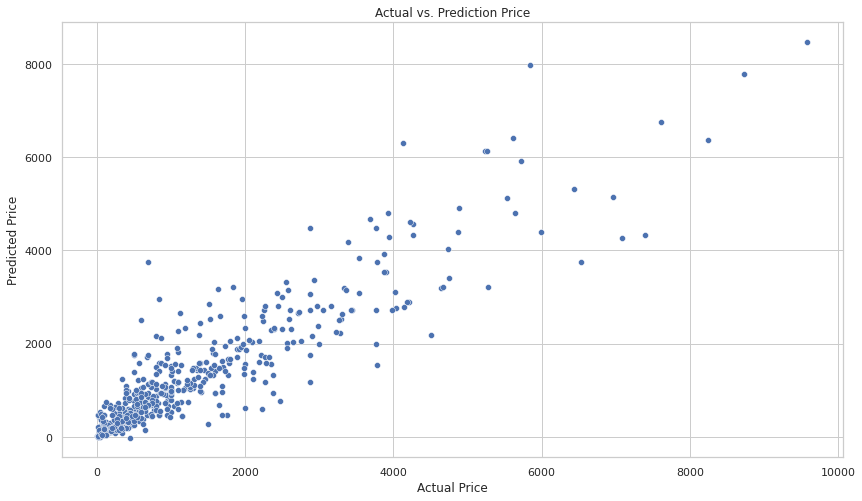

In [101]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgbt).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Dari plot tersebut, dapat kita lihat bahwa model masih cukup bias, dikarenakan masih terdapat beberapa harga prediksi yang masih jauh dari harga aktual.

### Analisis Feature & Interpretation

Pada bagian ini kami ingin melihat feature mana yang paling berpengaruh terhadap harga dari model yang kami miliki, serta melakukan analisis feature mana saja yang harus diperhatikan karena memiliki error prediksi yang besar.

1. Feature Importance & shap

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


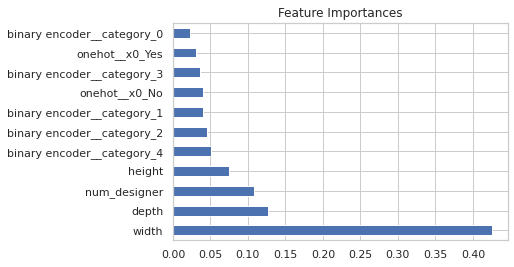

In [102]:
#Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');

In [103]:
!pip install shap
#Plot Shap
import shap

     |████████████████████████████████| 564 kB 4.9 MB/s 


In [104]:
estimator = Pipeline([
        ('preprocessing_lin', transformer),
        ('scaler', scaler)
        ])
estimator.fit(X_train)
X_train_prep = estimator.transform(X_train)

In [105]:
model_xgb = XGBRegressor(colsample_bytree=0.9, learning_rate=0.08,
                              max_depth=14, n_estimator=700, subsample=0.6)
model_xgb.fit(X_train_prep, y_train)

[15:05:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.9, learning_rate=0.08, max_depth=14,
             n_estimator=700, subsample=0.6)

In [106]:
X_prep = pd.DataFrame(X_train_prep)
X_prep.columns = transformer.get_feature_names()
X_prep

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


,onehot__x0_No,onehot__x0_Yes,binary encoder__category_0,binary encoder__category_1,binary encoder__category_2,binary encoder__category_3,binary encoder__category_4,num_designer,depth,height,width
0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,2.0,0.660714,0.134615,1.265957
1,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,-0.339286,0.500000,-0.382979
2,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,0.0,-0.535714,-0.250000,-0.202128
3,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,1.642857,-0.173077,-0.010638
4,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-0.392857,-1.461538,-0.489362
...,...,...,...,...,...,...,...,...,...,...,...
2364,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-0.410714,0.519231,-0.276596
2365,-1.0,1.0,0.0,1.0,-1.0,0.0,-1.0,0.0,-0.321429,2.288462,0.414894
2366,0.0,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.339286,0.365385,0.095745
2367,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.607143,-0.153846,-0.063830


In [107]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer(X_prep)

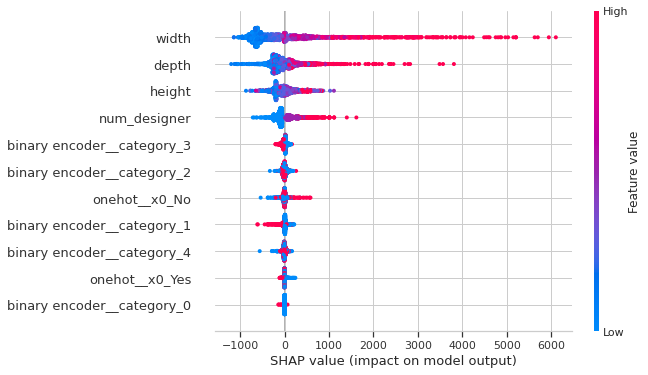

In [108]:
shap.summary_plot(shap_values)

Dari plot di atas (feature importance & shap), terlihat bahwa features yang memiliki pengaruh besar terhadap perubahan harga adalah Dimensi(width, depth, height) dan jumlah designer. 

Dari shap juga terlihat bahwa pengaruh dari feature Dimensi(width, depth, height) dan jumlah designer memiliki pengaruh yang se-arah positif. Dimana jika nilai dari feature tersebut bertambah, maka target(price) juga akan bertambah

2. Melihat Error setiap features

Pada bagian ini kami ingin melihat beberapa feature yang memiliki error besar. Definisi erorr besar kami anggap jika error di atas nilai MAE, sehingga nantinya jika terdapat feature yang nilai error-nya di atas MAE, perlu diperhatikan hasil prediksinya karena kemungkinan hasil yang diperloeh jauh dari harga aslinya

Feature-feature yang kami periksa adalah feature yang memiliki pengaruh besar terhadap harga (seperti yang sudah dijelaskan pada bagian feature importance)

In [109]:
df_test = X_test
df_test['y_test'] = y_test
df_test['y_pred'] = y_pred_xgbt
df_test['error'] = abs(y_test-y_pred_xgbt)

In [110]:
mae = mean_absolute_error(df_test['y_test'],df_test['y_pred'])

In [111]:
df_test

,category,other_colors,num_designer,depth,height,width,y_test,y_pred,error
2383,Sofas & armchairs,Yes,1,98.0,83.0,192.0,250.0,470.150024,220.150024
643,Bookcases & shelving units,No,1,30.0,179.0,174.0,1000.0,534.932434,465.067566
118,Beds,Yes,3,180.0,135.0,180.0,8735.0,7795.975098,939.024902
252,Beds,No,1,60.0,86.0,66.0,985.0,967.033813,17.966187
3532,Wardrobes,Yes,2,60.0,201.0,300.0,4870.0,4404.755371,465.244629
...,...,...,...,...,...,...,...,...,...
1681,Chests of drawers & drawer units,Yes,1,47.0,54.0,40.0,475.0,439.930511,35.069489
1319,Chairs,No,1,44.0,50.0,159.0,795.0,1143.474976,348.474976
3151,Tables & desks,No,1,180.0,75.0,90.0,995.0,988.611938,6.388062
2511,Sofas & armchairs,Yes,1,98.0,83.0,192.0,515.0,470.150024,44.849976


2a. Error di setiap kategori

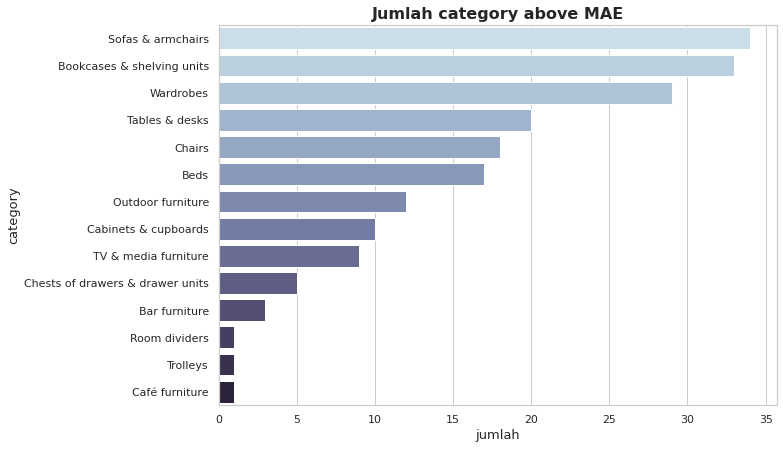

In [112]:
plt.figure(figsize=[10, 7])
result = df_test[df_test['error'] > mae]['category'].value_counts().reset_index()
sns.barplot(data=result, y='index', x='category', palette='ch:s=.25,rot=-.25')
plt.title('Jumlah category above MAE', fontsize = 16, fontweight='bold')
plt.xlabel('jumlah', fontsize = 13)
plt.ylabel('category', fontsize = 13)
plt.show()

Dari grafik di atas dapat dilihat bahwa category product Sofa & armchairs menyumbangkan jumlah terbesar dalam meningkatnya prediksi harga error. Diikuti oleh category Bookcases & shelving units kemudian wardobes. Perusahaan harus berhati-hati dalam menentukan harga yang productnya termasuk pada category tersebut (Terutama Sofa & armchairs).

2b. Error di jumlah designer

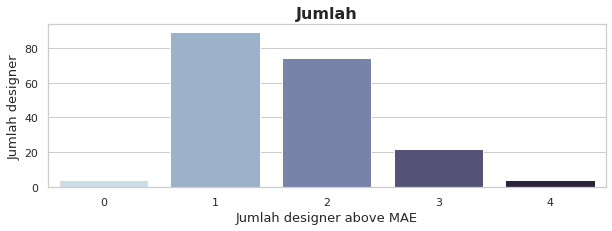

In [113]:
plt.figure(figsize=[10, 3])
result = df_test[df_test['error'] > mae]['num_designer'].value_counts().reset_index()
sns.barplot(data=result, x='index', y='num_designer', palette='ch:s=.25,rot=-.25')
plt.title('Jumlah', fontsize = 16, fontweight='bold')
plt.xlabel('Jumlah designer above MAE', fontsize = 13)
plt.ylabel('Jumlah designer', fontsize = 13)
plt.show()

Dari grafik terlihat bahwa hasil prediksi untuk jumlah designer 1 memiliki nilai error di atas MAE cukup banyak, sehingga nantinya harus berhati-hati dalam melakukan prediksi jika jumlah designer yang diinput adalah 1

2c. Error pada depth, height, width

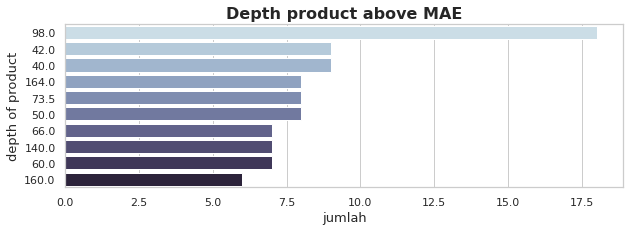

In [114]:
plt.figure(figsize=[10, 3])
result = df_test[df_test['error'] > mae]['depth'].value_counts().reset_index().sort_values('depth', ascending=False)[:10]
result['index'] = result['index'].astype(str) 
sns.barplot(data=result, y='index', x='depth', palette='ch:s=.25,rot=-.25')
plt.title('Depth product above MAE', fontsize = 16, fontweight='bold')
plt.xlabel('jumlah', fontsize = 13)
plt.ylabel('depth of product', fontsize = 13)
plt.show()

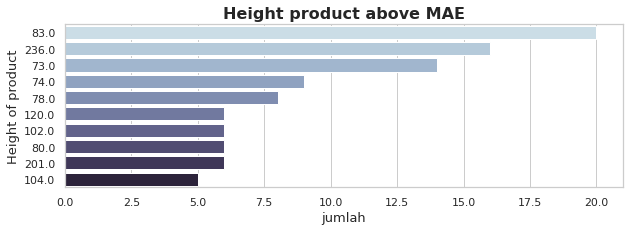

In [115]:
plt.figure(figsize=[10, 3])
result = df_test[df_test['error'] > mae]['height'].value_counts().reset_index().sort_values('height', ascending=False)[:10]
result['index'] = result['index'].astype(str) 
sns.barplot(data=result, y='index', x='height', palette='ch:s=.25,rot=-.25')
plt.title('Height product above MAE', fontsize = 16, fontweight='bold')
plt.xlabel('jumlah', fontsize = 13)
plt.ylabel('Height of product', fontsize = 13)
plt.show()

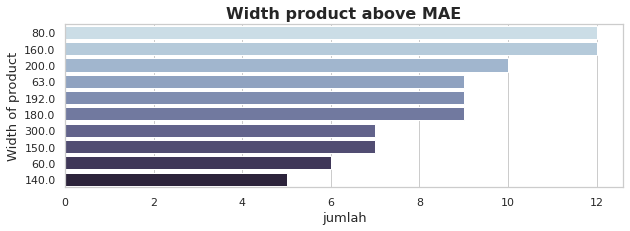

In [116]:
plt.figure(figsize=[10, 3])
result = df_test[df_test['error'] > mae]['width'].value_counts().reset_index().sort_values('width', ascending=False)[:10]
result['index'] = result['index'].astype(str) 
sns.barplot(data=result, y='index', x='width', palette='ch:s=.25,rot=-.25')
plt.title('Width product above MAE', fontsize = 16, fontweight='bold')
plt.xlabel('jumlah', fontsize = 13)
plt.ylabel('Width of product', fontsize = 13)
plt.show()

Dari data diatas dapat dilihat bahwa product dengan ukuran tertentu memberikan pengaruh terhadap tingginya prediksi error harga. Maka perusahaan sebaiknya memberikan perhatian lebih pada product dengan ukuran kedalaman 98 cm, tinggi 83 cm, dan lebar 80-160 cm untuk memperkecil error prediksi harga.

3. Test model dengan data baru

In [117]:
# Save model
import pickle

estimator = xgb_tuning
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_IKEA_XGB.sav', 'wb'))

[15:06:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [118]:
# Load model
filename = 'Model_IKEA_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

[15:06:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [119]:
X_train

,category,other_colors,num_designer,depth,height,width
119,Beds,Yes,3,97.0,90.0,200.0
1628,Chests of drawers & drawer units,No,2,41.0,109.0,45.0
1608,Chests of drawers & drawer units,No,1,30.0,70.0,62.0
2804,Tables & desks,No,0,152.0,74.0,80.0
1192,Chairs,No,0,38.0,7.0,35.0
...,...,...,...,...,...,...
763,Bookcases & shelving units,No,1,37.0,110.0,55.0
849,Cabinets & cupboards,Yes,1,42.0,202.0,120.0
1891,Nursery furniture,No,2,79.0,102.0,90.0
3156,Tables & desks,Yes,1,150.0,75.0,75.0


In [120]:
df_test

,category,other_colors,num_designer,depth,height,width,y_test,y_pred,error
2383,Sofas & armchairs,Yes,1,98.0,83.0,192.0,250.0,470.150024,220.150024
643,Bookcases & shelving units,No,1,30.0,179.0,174.0,1000.0,534.932434,465.067566
118,Beds,Yes,3,180.0,135.0,180.0,8735.0,7795.975098,939.024902
252,Beds,No,1,60.0,86.0,66.0,985.0,967.033813,17.966187
3532,Wardrobes,Yes,2,60.0,201.0,300.0,4870.0,4404.755371,465.244629
...,...,...,...,...,...,...,...,...,...
1681,Chests of drawers & drawer units,Yes,1,47.0,54.0,40.0,475.0,439.930511,35.069489
1319,Chairs,No,1,44.0,50.0,159.0,795.0,1143.474976,348.474976
3151,Tables & desks,No,1,180.0,75.0,90.0,995.0,988.611938,6.388062
2511,Sofas & armchairs,Yes,1,98.0,83.0,192.0,515.0,470.150024,44.849976


> Validasi model dengan data IKEA

In [121]:
# Coba prediksi data baru
new_data = pd.DataFrame({
    'category': ['Beds'], 
    'other_colors': ['Yes'],	
    'num_designer':	[3],
    'depth': [180],	
    'height': [135],	
    'width': [180]
})

new_data

,category,other_colors,num_designer,depth,height,width
0,Beds,Yes,3,180,135,180


In [122]:
# Predict new_data
harga_pred = loaded_model.predict(new_data)
print('Harga furniture :', harga_pred[0])

Harga furniture : 7795.975


Hasil telah dicek sama dengan hasil prediksi sebelum model di-save

> Prediksi harga furnitur dari luar IKEA

In [123]:
# Coba dari data furnitur kompetitor lain
#barang berupa meja dengan dimensi 80x45x80 cm
# Harga pada toko tersebut adalah SR 1600

table_1 = pd.DataFrame({
    'category': ['Tables & desks'], 
    'other_colors': ['Yes'],	
    'num_designer':	[1],
    'depth': [40],	
    'height': [45],	
    'width': [160]
})

table_1

,category,other_colors,num_designer,depth,height,width
0,Tables & desks,Yes,1,40,45,160


In [124]:
# Predict new_data
harga_table = loaded_model.predict(table_1)
harga_max = harga_table[0]+mae
harga_min = harga_table[0]-mae
print('Harga furniture dari hasil prediksi :', harga_table[0])
print('Dengan range harga prediksi: ', harga_min, '-', harga_max)

Harga furniture dari hasil prediksi : 1260.4929
Dengan range harga prediksi:  915.4404475563292 - 1605.5453922874208


Data yang dicoba adalah data dari toko furniture online di arab: woowonline.com. 

Kami ingin mencoba apakah hasil yang kami peroleh mendekati atau tidak, terlihat bahwa barang berupa meja dengan harga SR 1600 kami coba prediksi. 

- Dengan hasil dari model kami yaitu Harga: SR 1260 dengan range harga prediksi SR 915 - 1605. 
- Hasil prediksi menunjukan dibawah harga toko, tetapi masih dalam range prediksi. 
- Perbedaan hasil masih menunjukkan bahwa model masih perlu pengembangan lebih lanjut. 

# Conclusion: 

Berdasarkan hasil analisis dan pembuatan Model Machine Learning, model yang terpilih adalah **XGBoost Regressor** dengan parameter:
 - model__subsample: 0.6
 - model__n_estimator: 700
 - model__max_depth: 14
 - model__learning_rate: 0.08
 - model__colsample_bytree: 0.9

Pada model ini, fitur yang paling berpengaruh terhadap penentuan harga adalah fitur dimensi (width, depth, height) dan num_designer dimana semkain besar nilai fitur ini akan membuat harga furnitur semakin mahal, sehingga perusahaan harus memperhatikan fitur-fitur tersebut dalam mementukan harga produk.

Model ini memiliki R2 sebesar 0.84 atau 84%, yang artinya seluruh fitur berpengaruh secara simultan terhadap target(old_price), sedangkan 16% nya dipengaruhi oleh variabel lain yang tidak diteliti dalam model.

Apabila perusahaan menggunakan model ini, jika kita tinjau dari nilai MAE (rata-rata error absolute), dengan model yang sudah kita buat akan menghasilkan perkiraan harga yang meleset rata-rata sebesar 345 SR, tetapi tidak menutup kemungkinan harga akan meleset lebih jauh karena masih terdapat bias pada model seperti pada plot aktual vs prediksi.

Kedepannya untuk penetuan harga produk, perusahaan harus memperhatikan produk-produk dengan karakteristik sebagai berikut :
1. Produk yang memiliki kategori Sofas & Armchairs
2. Produk yang didesign oleh 1 designer
3. Produk dengan depth 98 cm
4. Produk dengan height 83 cm
5. Produk dengan width 80 dan 160 cm

Produk dengan karakteristik tersebut masih memiliki error yang cukup besar, sehingga prediksi harga masih underestimasi atau overestimasi.

Dengan bantuan model ini tentu perusahaan mendapat keuntungan: 
- Hasil dari competitor-based analysis dengan model ini lebih objektif dibanding dengan proses konvensional
- Perusahaan dapat menghemat sumber daya manusia (SDM) dan waktu untuk menentukan harga jual yang masih dapat bersaing dengan pasar, karena untuk menentukan perkiraan harga, perusahaan hanya perlu memasukkan detail produk dan dalam hitungan detik perusahaan mendapatkan perkiraan harga produk.
- Dalam riset yang kami lakukan, rata-rata perusahaan melakukan perencanaan harga adalah 4 hari [link artikel](https://www.researchgate.net/profile/Eric-Kh-Leung/publication/330557347_A_B2B_flexible_pricing_decision_support_system_for_managing_the_request_for_quotation_process_under_e-commerce_business_environment/links/5cdc5354458515712eadb28e/A-B2B-flexible-pricing-decision-support-system-for-managing-the-request-for-quotation-process-under-e-commerce-business-environment.pdf). Dengan model kami tentu perusahaan dapat mengalokasi waktu ini untuk kegiatan lain yang lebih bermanfaat untuk perusahaan. 




# Recommendation

Berdasarkan hasil yang kami peroleh, terlihat model masih bisa dioptimalkan kembali. Beberapa hal yang mungkin dapat membuat model prediksi menjadi lebih baik: 

1. Jika memungkinkan, penambahan fitur yang lebih korelatif. Beberapa fitur tersebut seperti material furnitur, kelas furnitur (apakah termasuk barang mewah atau tidak), dan fitur lain berkaitan dengan furnitur.

2. Penambahan data dari berbagai kompetitor juga dapat membuat prediksi harga menjadi lebih akurat, karena pada kenyataannya banyak pemain besar lainnya selain IKEA dalam bidang furnitur di Saudi Arabia

3. Saat melakukan hyperparameter tuning, bisa juga digunakan metode gridsearch serta parameter model yang lebih beragam untuk mendapatkan hasil yang lebih optimal. Karena pada model kami karena keterbatasan waktu dan alat, kami hanya melakukan 100 iterasi. 

4. Jika fitur dan data bertambah, dapat dicoba menggunakan model regresi lain yang lebih kompleks seperti deep learning atau neural network.  